# Data Preparation

## Importing the libraries

In [1]:
# Importing warning filter

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the libraries

import pandas as pd
import numpy as np
np.set_printoptions(precision = 4)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style = 'white', palette = 'colorblind')

from scipy import sparse
from numpy import count_nonzero

import imblearn
from imblearn.over_sampling import SMOTE

import sklearn.preprocessing as preproc
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, auc

## Importing the dataset and learning its basic information and statistics

In [3]:
# Reading the dataset

missing_value_formats = ['n.a.', '?', 'NA', 'n/a', 'na', '--']
df = pd.read_csv('Shill Bidding Dataset.csv', na_values = missing_value_formats)

In [4]:
# Discovering the shape of the dataset

df.shape

(6321, 13)

In [5]:
# Obtaining basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [6]:
# Observing a sample of the dataframe - head

df.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [7]:
# Observing a sample of the dataframe - tail

df.tail()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0
6320,15144,2481,a***l,0.016393,0.043478,0.0,0.340351,0.217391,0.993593,0.340351,0.000000,7,0


In [8]:
# Obtaining a summary of the dataset basic statistics

df.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


In [9]:
# Counting unique Auctions

df['Auction_ID'].value_counts()

589     26
1872    26
256     24
658     24
2498    23
        ..
1756     1
548      1
1971     1
458      1
2329     1
Name: Auction_ID, Length: 807, dtype: int64

In [10]:
# Counting unique Bidders

df['Bidder_ID'].value_counts()

a***a    112
n***t     85
e***e     67
i***a     50
r***r     49
        ... 
n***y      1
u***z      1
t***9      1
z***b      1
9***7      1
Name: Bidder_ID, Length: 1054, dtype: int64

In [11]:
# Counting Successive Outbidding's unique values

df['Successive_Outbidding'].value_counts()

0.0    5478
1.0     469
0.5     374
Name: Successive_Outbidding, dtype: int64

In [12]:
# Counting Auction Duration's unique values

df['Auction_Duration'].value_counts()

7     2427
3     1408
1     1289
5     1060
10     137
Name: Auction_Duration, dtype: int64

## Cleaning the dataset: duplicates, missing values and sparsity

In [13]:
# Checking for duplicates

print('There are a total of ' + (str(df.duplicated().sum()) + ' duplicates in the dataset.'))

There are a total of 0 duplicates in the dataset.


In [14]:
# Checking if there are any missing values

df.isnull().values.any()

False

In [15]:
# Calculating the sparsity of the data

sparsity = 1 - count_nonzero(df) / df.size
print('Sparsity of the dataframe is: ' + str(round(sparsity, 2)) + '.')

Sparsity of the dataframe is: 0.26.


In [16]:
# Confirming if data is sparse

sparse.issparse(df)

False

In [17]:
# Dropping columns

df2 = df.drop(columns = ['Record_ID', 'Auction_ID', 'Bidder_ID'])
df2

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...
6316,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


### _Random Forest Classifier - First test_

In [18]:
# Splitting the dataset into X and Y


# Assigning the independet variables to a new dataset X

X = df2.drop('Class', axis = 1)

# Assigning the dependent variable to a new variable y

y = df2['Class']

In [19]:
# Splitting the dataset into the training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
2882,0.200000,0.100000,0.0,0.000104,0.000000,0.000000,0.000104,0.666667,1
4340,0.142857,0.095238,0.0,0.164572,0.142857,0.000000,0.164525,0.000000,1
642,0.041667,0.083333,0.0,0.018495,0.000000,0.000000,0.018495,0.000000,1
2450,0.100000,0.032258,0.0,0.013026,0.419355,0.993593,0.013026,0.000000,7
3258,0.016129,0.011765,0.0,0.980719,0.788235,0.993528,0.980719,0.000000,7
...,...,...,...,...,...,...,...,...,...
3772,0.125000,0.023256,0.0,0.709292,0.581395,0.993528,0.709292,0.000000,7
5191,0.019231,0.040000,0.0,0.812326,0.280000,0.000000,0.812326,0.000000,5
5226,0.017241,0.083333,0.0,0.659924,0.000000,0.000000,0.659924,0.000000,7
5390,0.125000,0.142857,0.0,0.088314,0.000000,0.000000,0.088314,0.714286,3


In [20]:
# Training the model on the training set (not scaled or resampled dataset)

classifier_rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
classifier_rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [21]:
# Predicting the test set results

y_pred_rfc = classifier_rfc.predict(X_test)
print(np.concatenate((y_pred_rfc.reshape(len(y_pred_rfc), 1), y_test.values.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [22]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('Confusion Matrix:')
print(cm_rfc)
print()
print('The accuracy of the Random Forest Classifier model is ' + str(
    round(accuracy_score(y_test, y_pred_rfc), 4)) + '.')

Confusion Matrix:
[[1419    6]
 [   2  154]]

The accuracy of the Random Forest Classifier model is 0.9949.


In [23]:
# Printing a report of all scores for the model

print(classification_report(y_test, y_pred_rfc, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1425
     Class 1       0.96      0.99      0.97       156

    accuracy                           0.99      1581
   macro avg       0.98      0.99      0.99      1581
weighted avg       1.00      0.99      0.99      1581



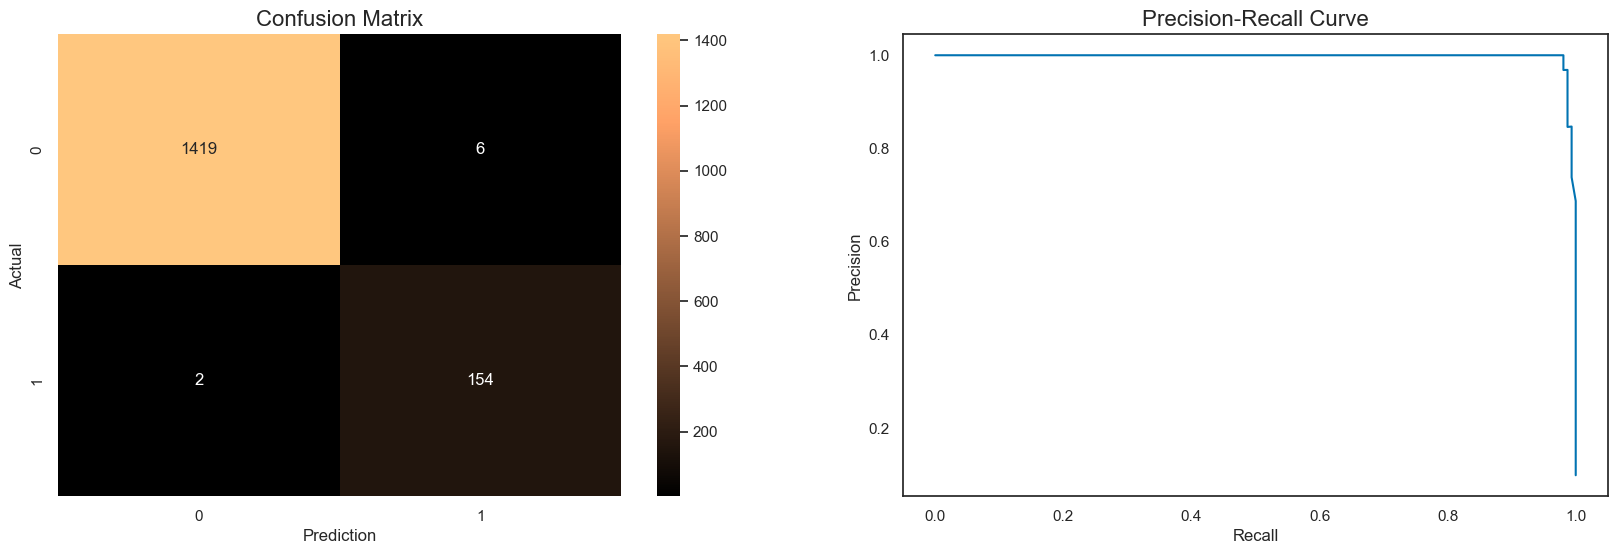

In [24]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_rfc, ax = ax[0], annot = True, cmap = plt.cm.copper, fmt = 'g')
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_rfc = classifier_rfc.predict_proba(X_test)[:, 1]
precision_rfc, recall_rfc, _ = precision_recall_curve(y_test, y_score_rfc)
ax[1].plot(recall_rfc, precision_rfc)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [25]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the Random Forest Classifier in the scenario with no treatment is ' + str(
    round(auc(recall_rfc, precision_rfc), 4)) + '.')

The AUC for the Random Forest Classifier in the scenario with no treatment is 0.997.


### _K-Nearest Neighbor Classifier - First test_

In [26]:
# Training the model on the training set

classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
# Predicting the test set results

y_pred_knn = classifier_knn.predict(X_test)
print(np.concatenate((y_pred_knn.reshape(len(y_pred_knn), 1), y_test.values.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [28]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_knn = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:')
print(cm_knn)
print()
print('The accuracy of the K-Nearest Neighbors model is ' + str(
    round(accuracy_score(y_test, y_pred_knn), 4)) + '.')

Confusion Matrix:
[[1424    1]
 [   6  150]]

The accuracy of the K-Nearest Neighbors model is 0.9956.


In [29]:
# Printing a report of all scores for the model

print(classification_report(y_test, y_pred_knn, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1425
     Class 1       0.99      0.96      0.98       156

    accuracy                           1.00      1581
   macro avg       0.99      0.98      0.99      1581
weighted avg       1.00      1.00      1.00      1581



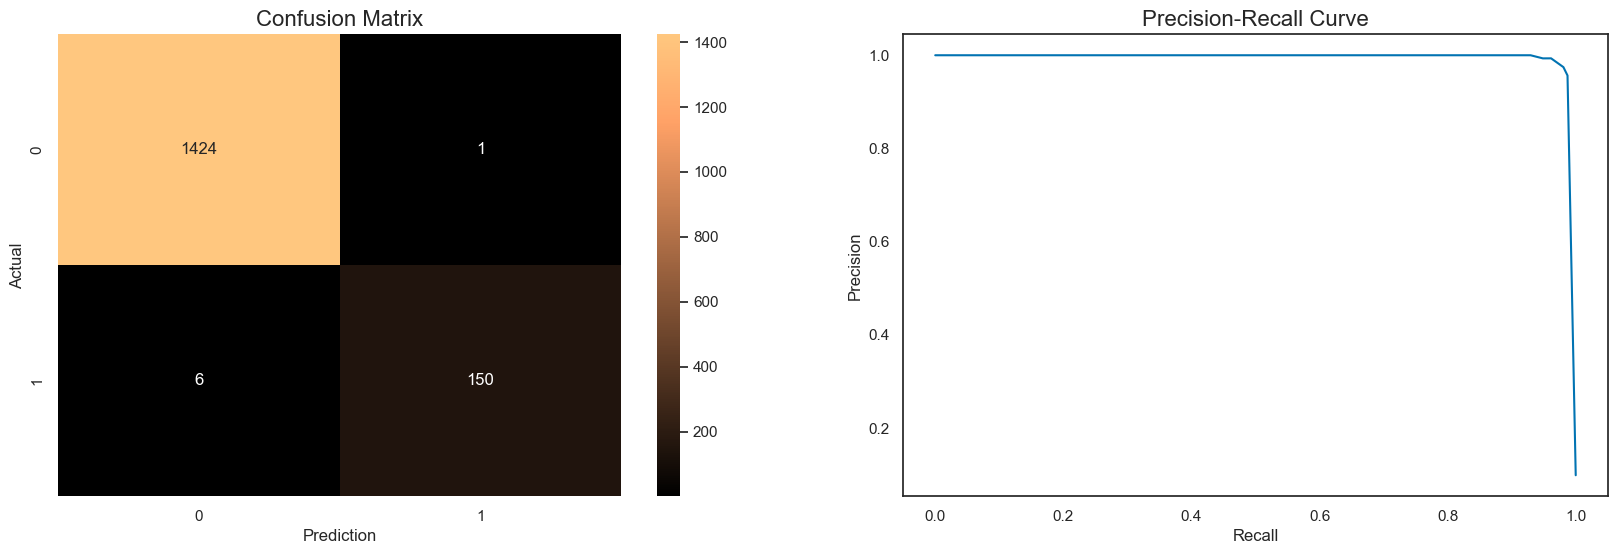

In [30]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_knn, ax = ax[0], annot = True, cmap = plt.cm.copper, fmt = 'g')
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_knn = classifier_knn.predict_proba(X_test)[:, 1]
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_score_knn)
ax[1].plot(recall_knn, precision_knn)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [31]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the K-Nearest Neighbor Classifier in the scenario with no treatment is ' + str(
    round(auc(recall_knn, precision_knn), 4)) + '.')

The AUC for the K-Nearest Neighbor Classifier in the scenario with no treatment is 0.9933.


## Plotting graphs: outliers, distribution, clustermap

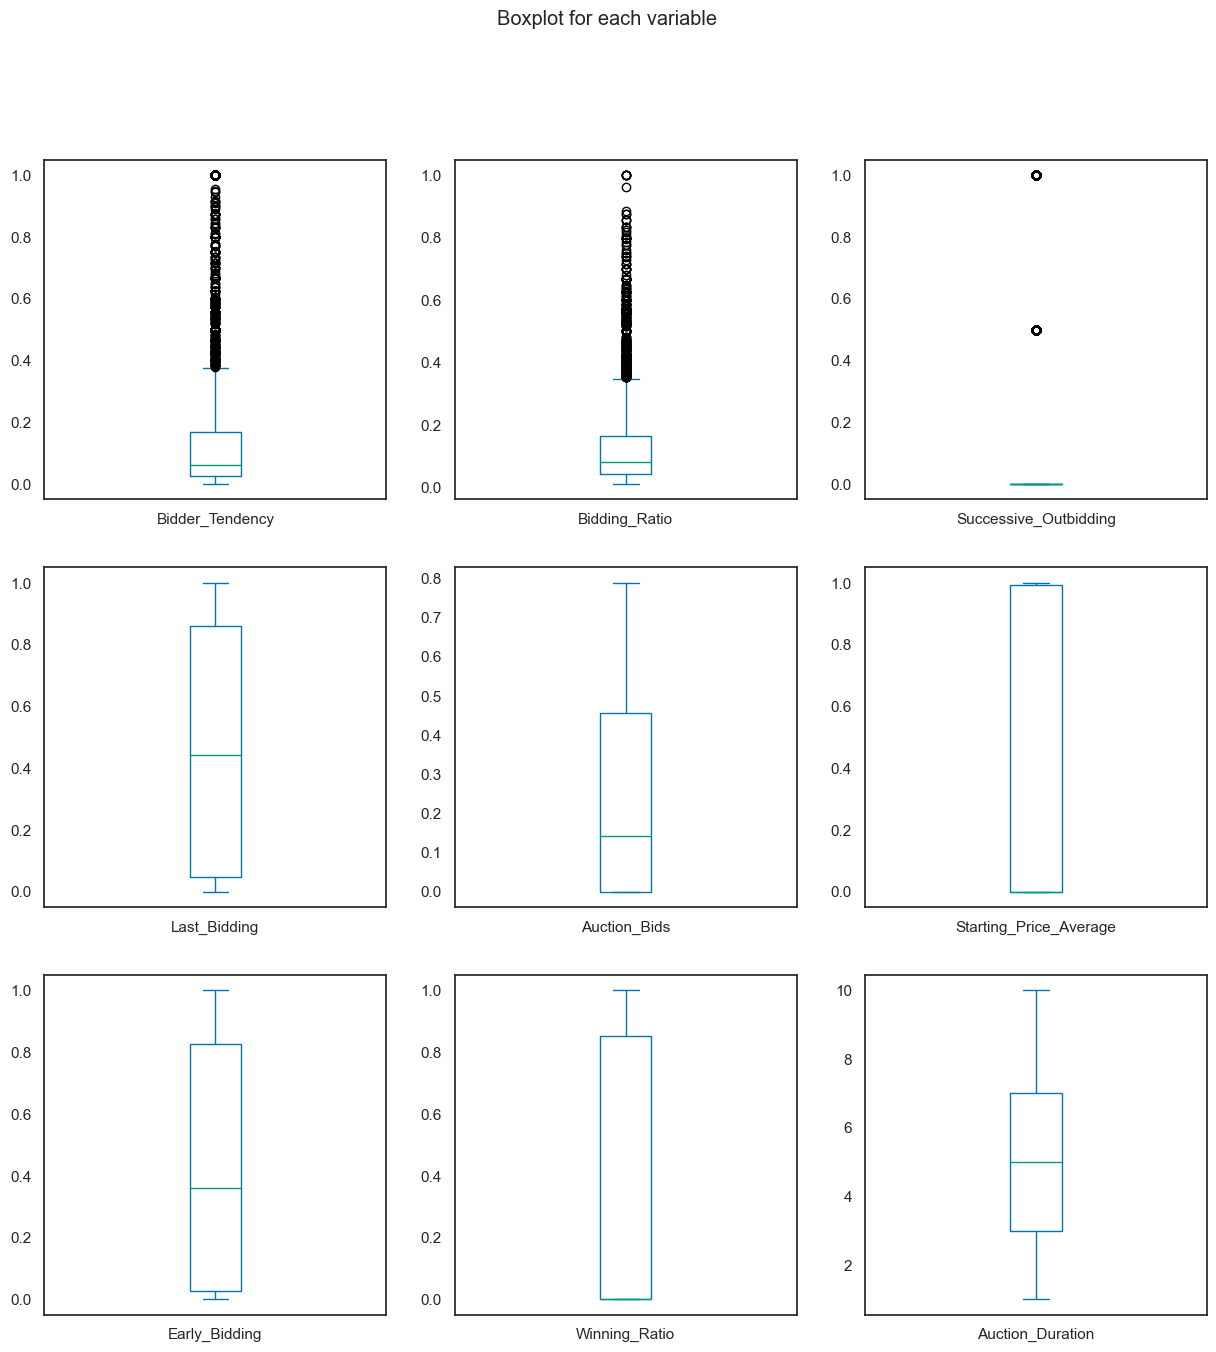

In [32]:
# Plotting boxplots to look for outliers

df2.drop('Class', axis = 1).plot(kind = 'box', subplots = True, layout = (3, 3), figsize = (15, 15),
                                 title = 'Boxplot for each variable');

As the dataset was pre-processed, cleaned and treated for the purpose of creating the clusters and defining the classes (Alzahrani and Sadaoui, 2018b), the entries identified in the boxplots as outliers will not be removed, as they might carry essential information to correctly flag suspicious activities.

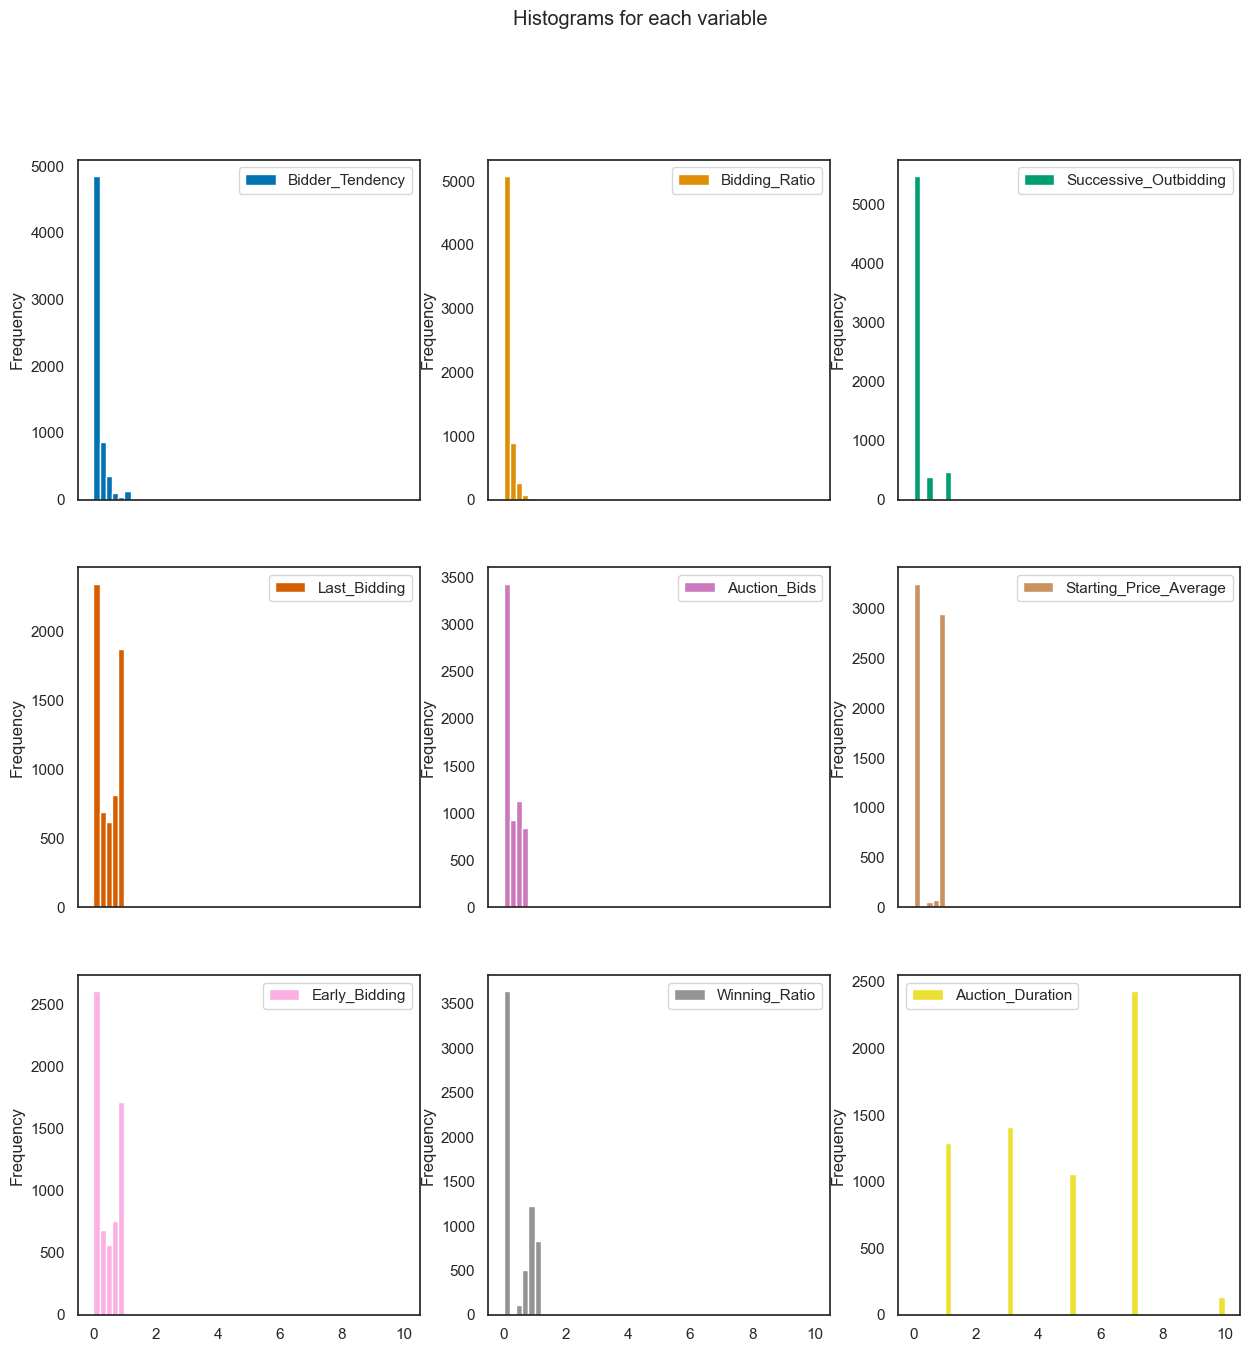

In [33]:
# Plotting histograms to look at the distribution of the attributes

df2.drop('Class', axis = 1).plot(kind = 'hist', subplots = True, layout = (3, 3), figsize = (15, 15), bins = 50,
                                 title = 'Histograms for each variable');

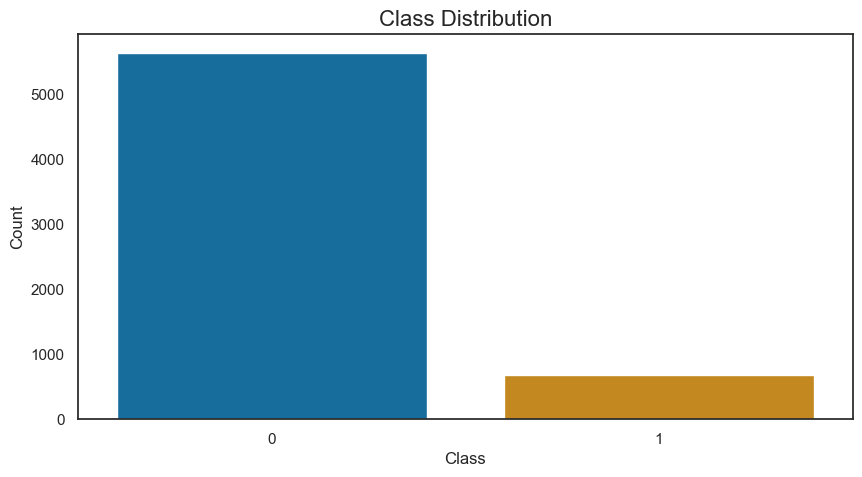

In [34]:
# Plotting a histogram to look at the distribuition of the dependent variable - "Class"

plt.figure(figsize = (10, 5))
count = sns.countplot(x = 'Class', data = df2)
count.axes.set_title('Class Distribution', fontsize = 16)
count.set_xlabel('Class')
count.set_ylabel('Count');

In [35]:
# Counting values and percentages of Class variable

print("Counts:")
print(df2.Class.value_counts())
print()
print("Percentages:")
print(df2.Class.value_counts() / len(df2.Class)) 

Counts:
0    5646
1     675
Name: Class, dtype: int64

Percentages:
0    0.893213
1    0.106787
Name: Class, dtype: float64


In [36]:
# Imbalance Ratio {Size of majority class}/{Size of minority class}

print('Imbalance Ratio:')
print(round(5645/675, 2))

Imbalance Ratio:
8.36


Müller and Guido (2017, p. 277)  define imbalanced datasets or datasets with imbalanced classes as the ones where one class is much more frequent than the other and this can cause some types of errors. For instance, a common error is overfitting, which occurs when the performance on the test set is much worse than the performance on the training set (Harrison, 2019, p. 156). 

Vluymans (2019, pp. 3, 82) explains that in a two-class dataset, the imbalance ratio (IR) is defined as the ratio of the size of the majority class to the size of the minority class. The definition of IR implies that its value is greater than or equal to 1. When this value is equal to 1, it means that the dataset is perfectly balanced. Furthermore, the greater the value, the more imbalanced the dataset is. While IR = 1.5 is enough to consider the dataset as imbalanced, an IR = 9 is often used as the threshold above which datasets are regarded as highly imbalanced.

That said, it is possible to say that this dataset is close enough to be considered highly imbalanced, as its IR = 8.36. This issue will be dealt with later on.

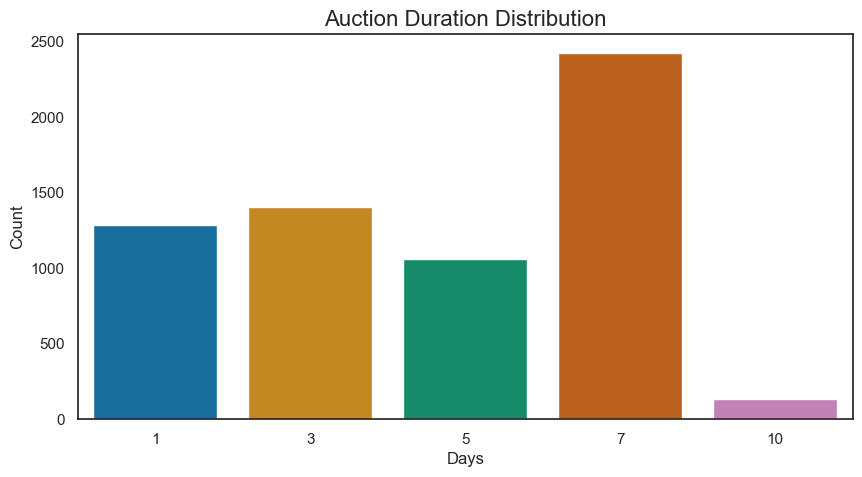

In [37]:
# Plotting a histogram to look at the distribuition of the variable - "Auction Duration"

plt.figure(figsize = (10, 5))
count = sns.countplot(x = 'Auction_Duration', data = df2)
count.axes.set_title('Auction Duration Distribution',fontsize = 16)
count.set_xlabel('Days')
count.set_ylabel('Count');

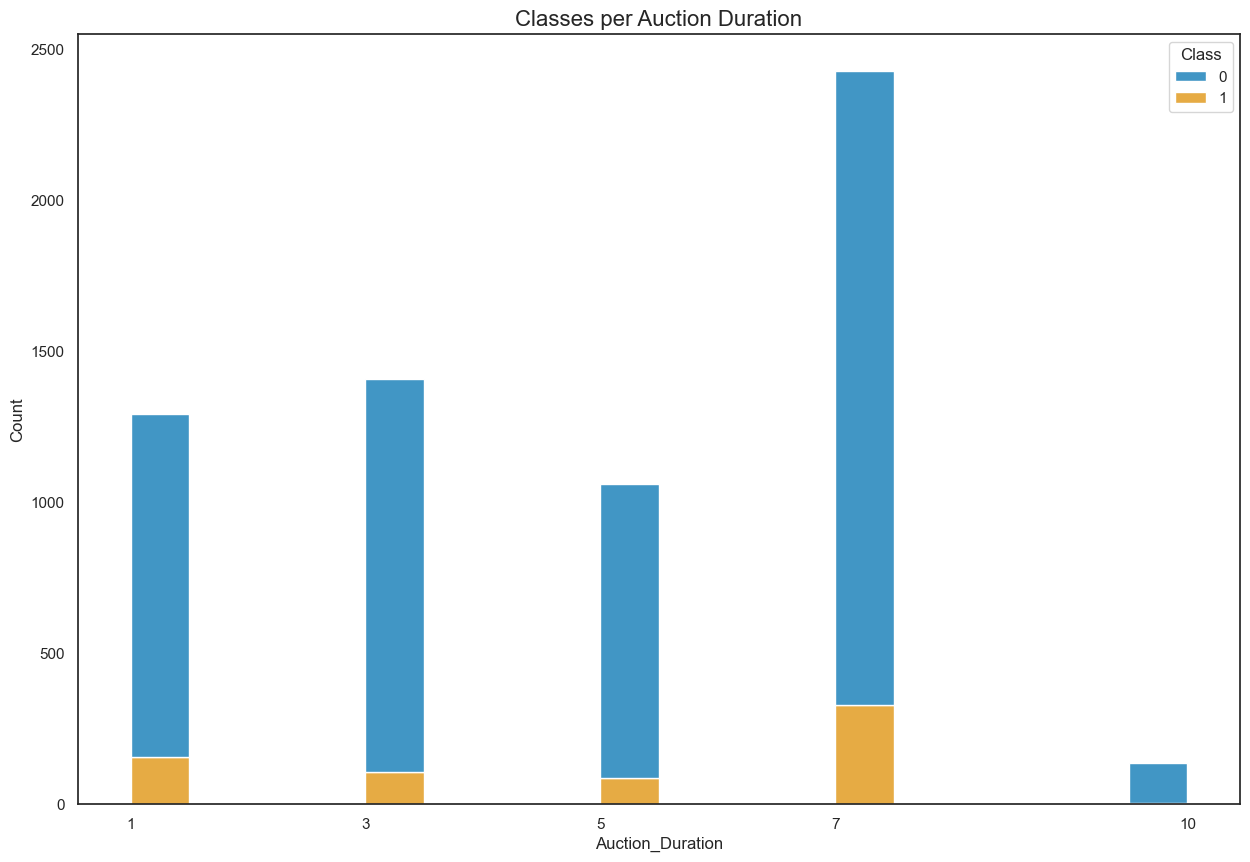

In [38]:
# Plotting a histogram to check the proportion of Classes per Auction Duration

plt.figure(figsize = (15, 10))
aucdur_class = sns.histplot(binwidth = 0.5, x = 'Auction_Duration', hue = 'Class', data = df2, stat = 'count',
                            multiple = 'stack')

aucdur_class.axes.set_title('Classes per Auction Duration',fontsize = 16)
aucdur_class.set_xticks([1, 3, 5, 7, 10]);

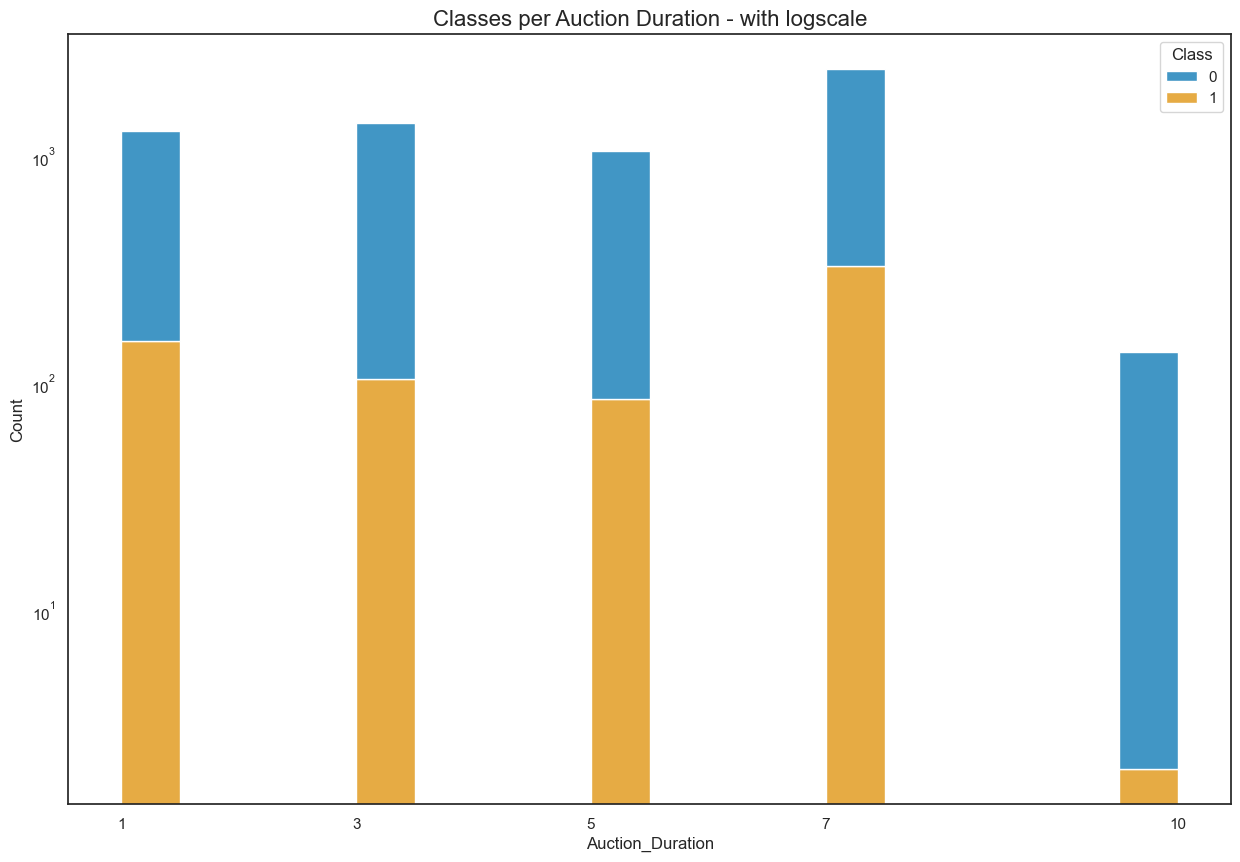

In [39]:
# Plotting a histogram to check the proportion of Classes per Auction Duration - log scale

plt.figure(figsize = (15,10))
aucdur_class = sns.histplot(binwidth = 0.5, x = 'Auction_Duration', hue = 'Class', data = df2, stat = 'count',
                            multiple = 'stack', log_scale = (False, True))

aucdur_class.axes.set_title('Classes per Auction Duration - with logscale',fontsize = 16)
aucdur_class.set_xticks([1, 3, 5, 7, 10]);

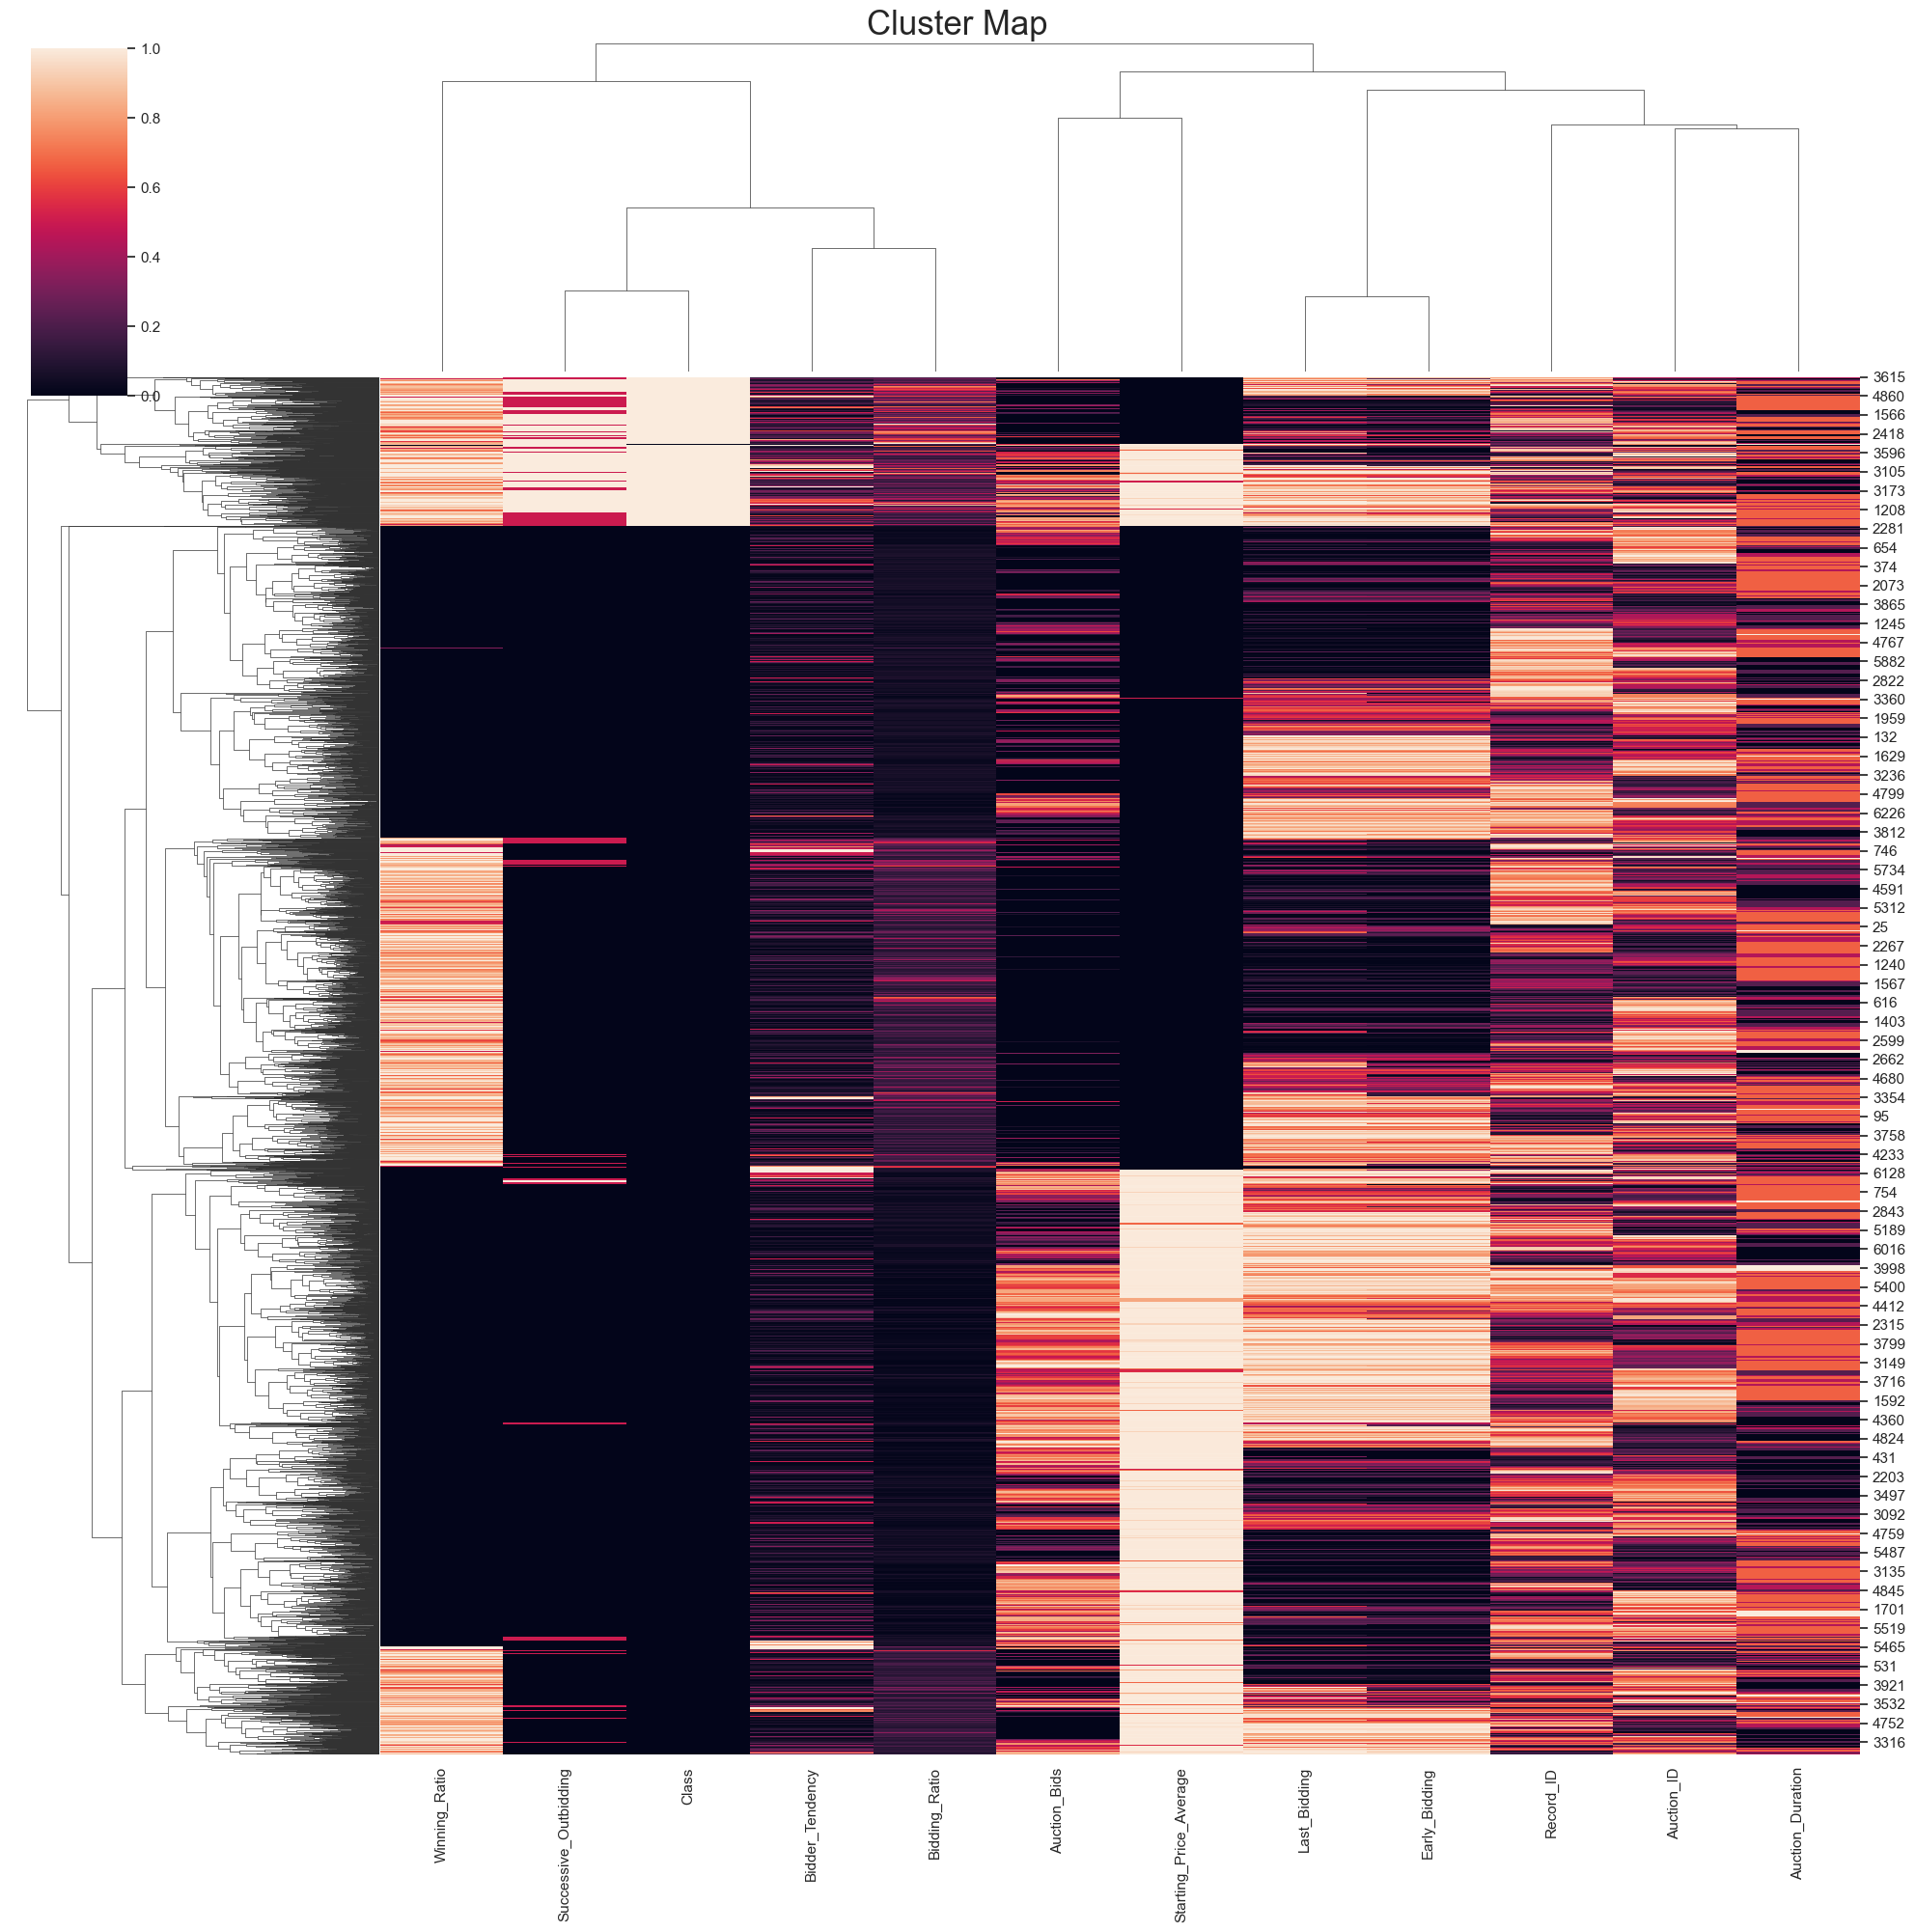

In [40]:
# Plotting a clustermap

df_cluster = sns.clustermap(df.drop('Bidder_ID', axis = 1), standard_scale = 1, figsize = (20, 20))
df_cluster.fig.suptitle('Cluster Map', x = 0.5, y = 1, fontsize = 25);

As this is a classification problem, a cluster map was plotted instead of a regular heat map. The seaborn function for cluster map plots a dataset as a hierarchically-clustered heat map. Even though it is not possible to analyse the relationship between the rows – as they are numerous, the main objective here is to explore how the attributes cluster with each other. It can be observed that the variable that clusters first with Class is “Successive_Outbidding”, then they both cluster with “Bidder_Tendency” and “Bidding_Ration”, which cluster with “Winning_Ratio” in the sequence, before clustering with the other major group.

## Scaling the dataset

In [41]:
# Scaling the variable "Auction_Duration" and assigning the result to a new dataset "df_scaled"

scaler = preproc.MinMaxScaler()
X[['Auction_Duration_SC']] = scaler.fit_transform(X[['Auction_Duration']])
X = X.drop('Auction_Duration', axis = 1)
df_scaled = X.join(y)
df_scaled.head(20)

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration_SC,Class
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,0.444444,0
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,0.444444,0
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,0.444444,0
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,0.444444,0
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,0.666667,0
5,0.038462,0.111111,0.0,0.016844,0.000000,0.000000,0.016844,0.800000,0.666667,0
6,0.400000,0.222222,0.0,0.006781,0.000000,0.000000,0.006774,0.750000,0.666667,0
7,0.137931,0.444444,1.0,0.768044,0.000000,0.000000,0.016311,1.000000,0.666667,1
8,0.121951,0.185185,1.0,0.035021,0.333333,0.993528,0.023963,0.944444,0.666667,1
9,0.155172,0.346154,0.5,0.570994,0.307692,0.993593,0.413788,0.611111,0.666667,1


In [42]:
# Splitting the scaled dataset


# Assigning the independet variables to a new dataset X

X_scaled = df_scaled.drop('Class', axis = 1)

# Assigning the dependent variable to a new variable y

y_scaled = df_scaled['Class']

## Balancing the dataset

There are two commom possibilities to balance a dataset that will be used here: oversample the minority class by creating synthetic data or undersample the majority class by deleting entries.

The main concern in regards to oversampling the dataset is that the synthetic data created could cause any type of bias in the fraud classification scenario, which is very delicate. On the other hand, undersampling would result in a dataset much smaller, with less than 1500 entries, which could mean not enough information for building machine learning models.

In this case, both techniques were applied in the training set in order to experiment, explore and compare their results.

### Undersampling

In [43]:
# Preparing minority and majority classes for Random Undersampling

minority_class_len = len(df_scaled[df_scaled['Class'] == 1])
print('Minority class length is ' + str(minority_class_len) + '.')
print()

majority_class_len = len(df_scaled[df_scaled['Class'] == 0])
print('Majority class length is ' + str(majority_class_len) + '.')
print()

minority_class_ind = df_scaled[df_scaled['Class'] == 1].index
print('Minority class index is: ')
print(minority_class_ind)
print()

majority_class_ind = df_scaled[df_scaled['Class'] == 0].index
print('Majority class index is: ')
print(majority_class_ind)

Minority class length is 675.

Majority class length is 5646.

Minority class index is: 
Int64Index([   7,    8,    9,   10,   13,   18,   23,   37,   41,   52,
            ...
            6263, 6266, 6267, 6278, 6280, 6284, 6285, 6289, 6295, 6316],
           dtype='int64', length=675)

Majority class index is: 
Int64Index([   0,    1,    2,    3,    4,    5,    6,   11,   12,   14,
            ...
            6310, 6311, 6312, 6313, 6314, 6315, 6317, 6318, 6319, 6320],
           dtype='int64', length=5646)


In [44]:
# Randomly Undersampling the majority class

random_majority_ind = np.random.choice(majority_class_ind, minority_class_len, replace = False)
print('Majority class length is now ' + str(len(random_majority_ind)) + '.')

Majority class length is now 675.


In [45]:
# Concatenating minority class and undersampled majority class in a new dataset

df_scaled_us_ind = np.concatenate([minority_class_ind, random_majority_ind])
df_scaled_us = df_scaled.loc[df_scaled_us_ind]
df_scaled_us = df_scaled_us.reset_index()
df_scaled_us = df_scaled_us.drop('index', axis = 1)
df_scaled_us

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration_SC,Class
0,0.137931,0.444444,1.0,0.768044,0.000000,0.000000,0.016311,1.000000,0.666667,1
1,0.121951,0.185185,1.0,0.035021,0.333333,0.993528,0.023963,0.944444,0.666667,1
2,0.155172,0.346154,0.5,0.570994,0.307692,0.993593,0.413788,0.611111,0.666667,1
3,0.600000,0.562500,1.0,0.457631,0.000000,0.000000,0.457474,0.600000,0.666667,1
4,0.041322,0.208333,1.0,0.286045,0.250000,0.000000,0.286025,0.818182,0.666667,1
...,...,...,...,...,...,...,...,...,...,...
1345,0.500000,0.285714,0.0,0.000018,0.000000,0.000000,0.000000,1.000000,0.666667,0
1346,0.040000,0.062500,0.0,0.231100,0.000000,0.000000,0.231100,0.000000,0.000000,0
1347,0.017241,0.111111,0.0,0.005637,0.000000,0.000000,0.005637,0.851852,0.666667,0
1348,0.020619,0.117647,0.0,0.010706,0.000000,0.000000,0.010648,0.750000,0.000000,0


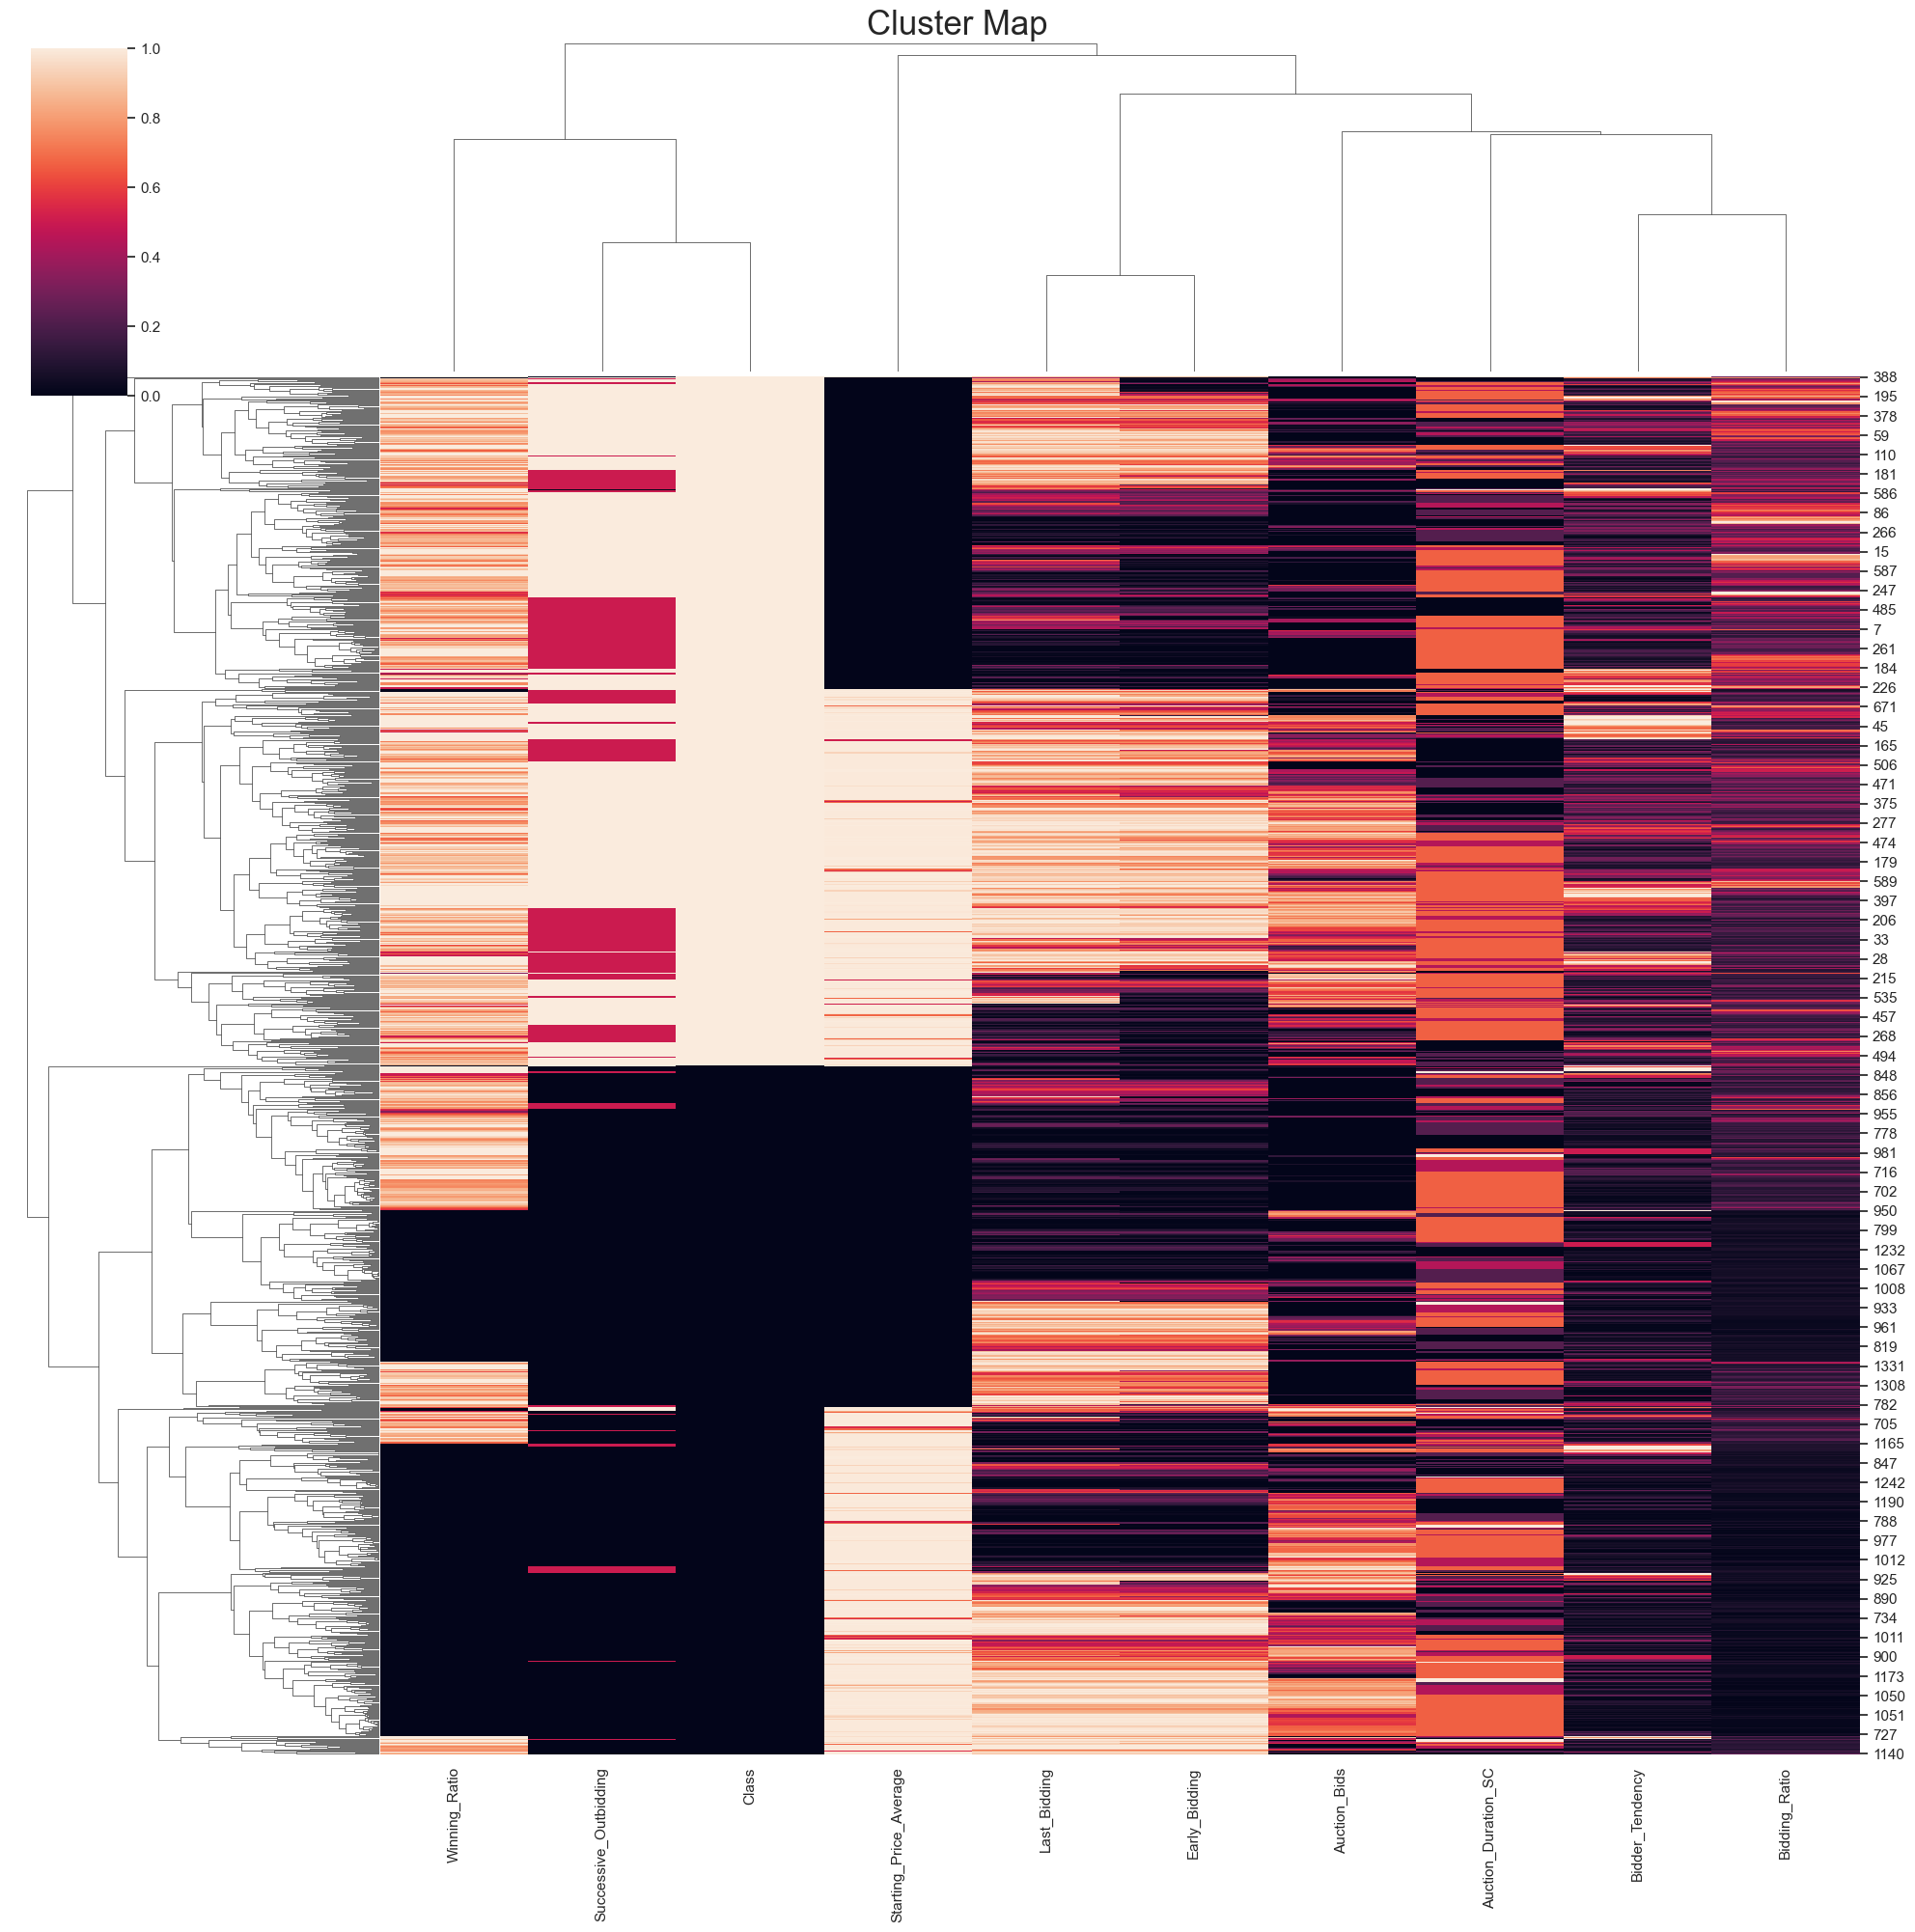

In [46]:
# Plotting a clustermap - scaled and undersampled

df_scaled_us_cluster = sns.clustermap(df_scaled_us, standard_scale = 1, figsize = (20, 20))
df_scaled_us_cluster.fig.suptitle('Cluster Map', x = 0.5, y = 1, fontsize = 25);

In [47]:
# Splitting the undersampled dataset


# Assigning the independet variables to a new dataset X

X_scaled_us = df_scaled_us.drop('Class', axis = 1)

# Assigning the dependent variable to a new variable y

y_scaled_us = df_scaled_us['Class']

### Oversampling

In [48]:
# Resampling the minority class

sm = SMOTE(sampling_strategy = 'auto', random_state = 42)

In [49]:
# Fitting the model to generate the data - oversampling

X_scaled_os, y_scaled_os = sm.fit_resample(X_scaled, y_scaled)
df_scaled_os = pd.concat([pd.DataFrame(X_scaled_os), pd.DataFrame(y_scaled_os)], axis = 1)
df_scaled_os

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration_SC,Class
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,0.444444,0
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,0.444444,0
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,0.444444,0
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,0.444444,0
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,0.666667,0
...,...,...,...,...,...,...,...,...,...,...
11287,0.121052,0.120905,0.5,0.906801,0.590316,0.993593,0.906747,0.968687,0.597081,1
11288,0.280345,0.556158,1.0,0.353334,0.000000,0.000000,0.353286,0.704377,0.463711,1
11289,0.658713,0.477818,1.0,0.500343,0.120436,0.000000,0.490149,0.658713,0.666667,1
11290,0.028412,0.336017,1.0,0.010822,0.000000,0.000000,0.010756,0.871007,0.124412,1


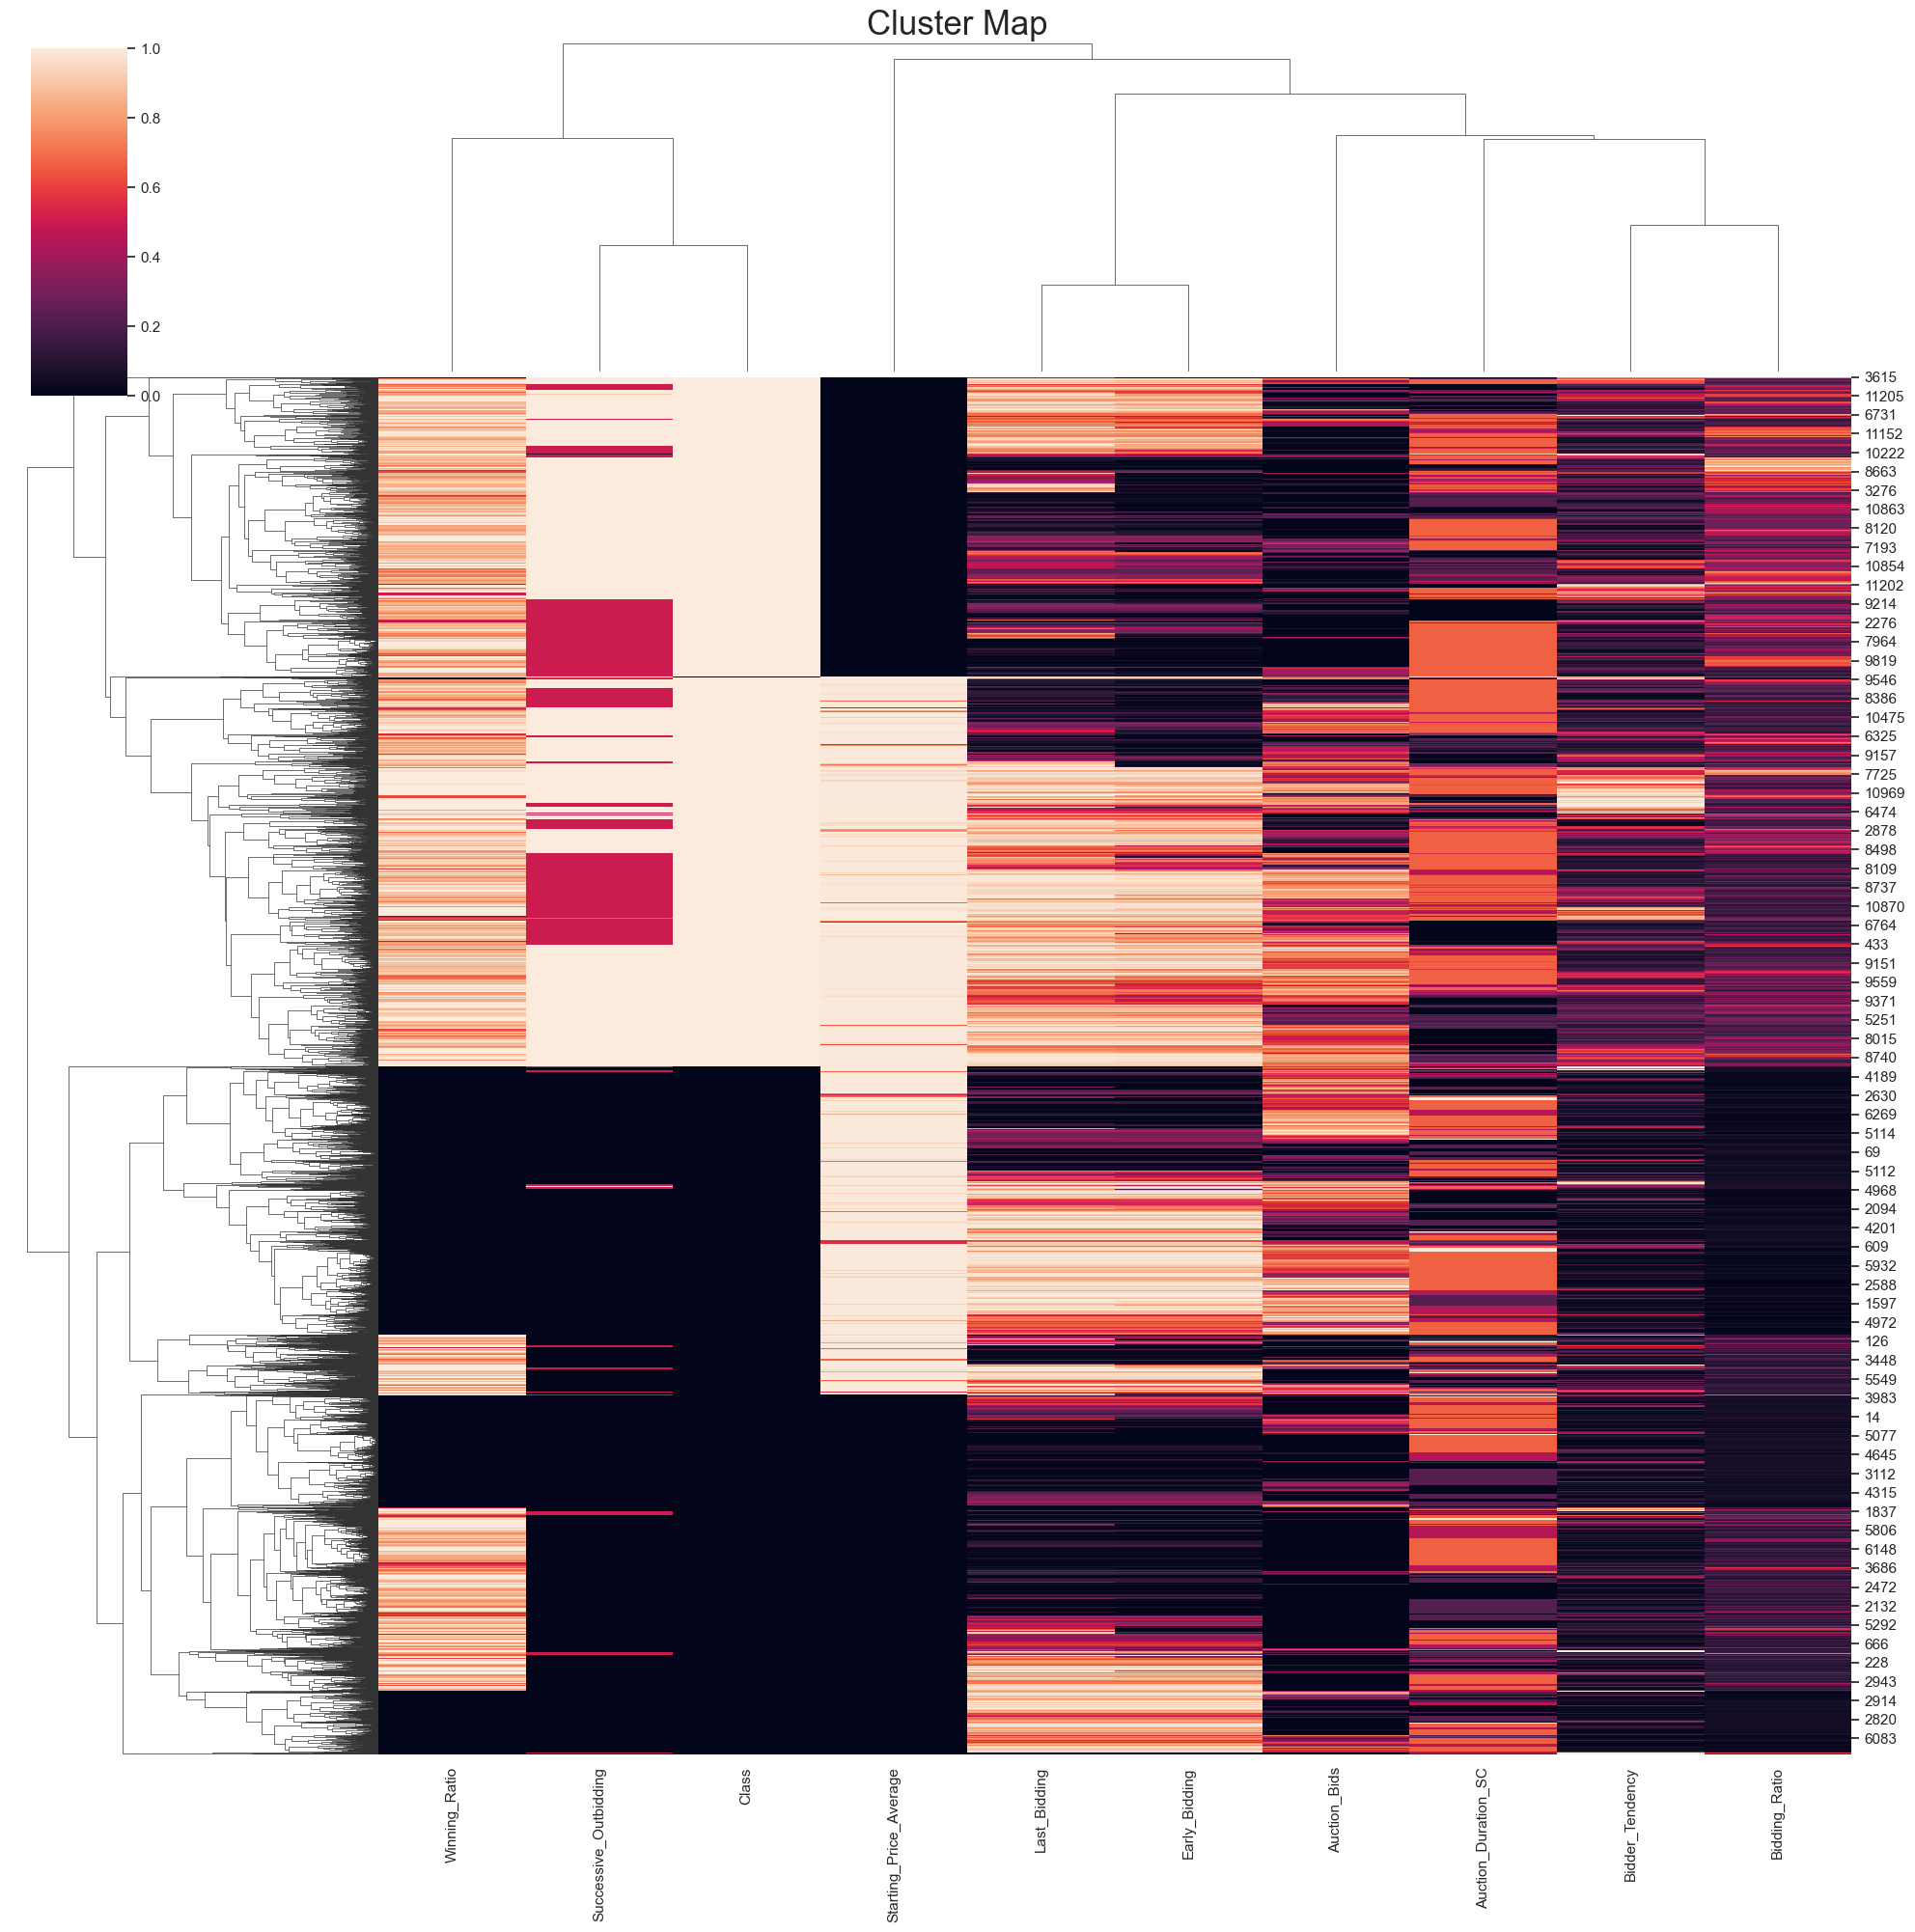

In [50]:
# Plotting a clustermap - scaled and oversampled

df_scaled_os_cluster = sns.clustermap(df_scaled_os, standard_scale = 1, figsize = (20, 20))
df_scaled_os_cluster.fig.suptitle('Cluster Map', x = 0.5, y = 1, fontsize = 25);

After each technique, another cluster map was plotted and it is possible to see that the hierarchy of the clusters changed. In comparison to the original dataset, the first main cluster is different, grouping “Class”, “Successive_Outbidding” and “Winning_Ratio”, though it is the same cluster for undersampled and oversampled datasets. This difference is, most likely, a consequence of scaling the “Auction_Duration” variable. Nonetheless, while comparing the new datasets to each other, it is possible to see some differences in the second main cluster that groups all other attributes. Those differences were caused, in this case, by the different resampling techniques.

## Linear Discriminant Analysis and Principal Component Analysis

In [51]:
# Linear Discriminant Analysis (LDA) - undersampled

X_train_scaled_us, X_test_scaled_us, y_train_scaled_us, y_test_scaled_us = train_test_split(
    X_scaled_us, y_scaled_us, test_size = 0.25, random_state = 42)

lda_us = LinearDiscriminantAnalysis()
X_lda_train_us = lda_us.fit_transform(X_train_scaled_us, y_train_scaled_us)
X_lda_test_us = lda_us.transform(X_test_scaled_us)
X_lda_train_us

array([[ 1.9317],
       [ 2.8058],
       [ 2.5345],
       ...,
       [ 2.6805],
       [ 2.529 ],
       [-0.6784]])

In [52]:
# LDA Explained Variance Ratio

lda_us.explained_variance_ratio_

array([1.])

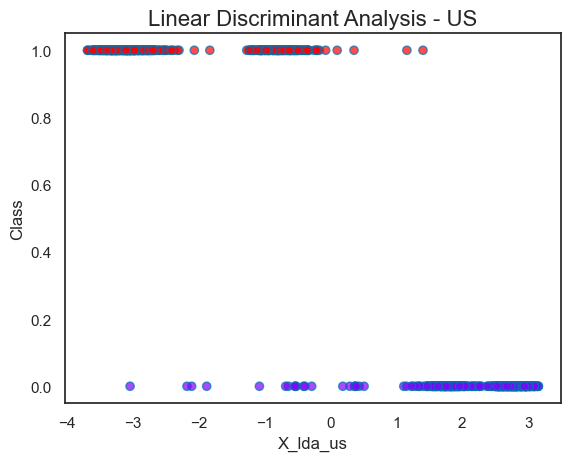

In [53]:
# LDA scatterplot - undersampled

plt.scatter(X_lda_train_us, y_train_scaled_us, c = y_train_scaled_us, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.title('Linear Discriminant Analysis - US', fontsize = 16)
plt.xlabel('X_lda_us')
plt.ylabel('Class');

In [54]:
# Linear Discriminant Analysis (LDA) - oversampled

X_train_scaled_os, X_test_scaled_os, y_train_scaled_os, y_test_scaled_os = train_test_split(
    X_scaled_os, y_scaled_os, test_size = 0.25, random_state = 42)

lda_os = LinearDiscriminantAnalysis()
X_lda_train_os = lda_os.fit_transform(X_train_scaled_os, y_train_scaled_os)
X_lda_test_os = lda_os.transform(X_test_scaled_os)
X_lda_train_os

array([[-3.2595],
       [-0.8426],
       [-3.0243],
       ...,
       [ 2.2376],
       [ 2.6321],
       [-2.9398]])

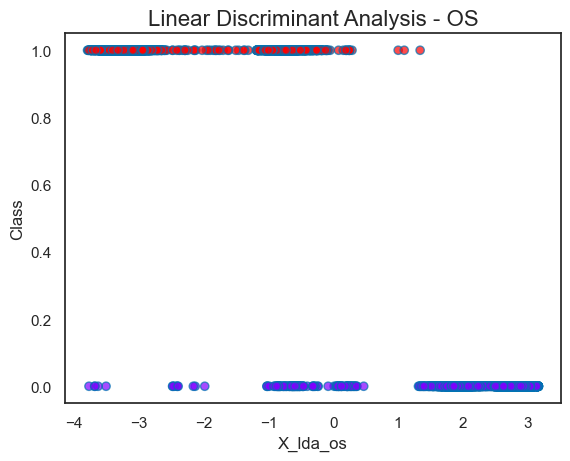

In [55]:
# LDA scatterplot - oversampled

plt.scatter(X_lda_train_os, y_train_scaled_os, c = y_train_scaled_os, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.title('Linear Discriminant Analysis - OS', fontsize = 16)
plt.xlabel('X_lda_os')
plt.ylabel('Class');

In [56]:
# Principal Component Analysis (PCA) - for undersampled dataset

pca_us = PCA(n_components = 1, random_state = 42)
X_pca_train_us = pca_us.fit_transform(X_train_scaled_us)
X_pca_test_us = pca_us.fit_transform(X_test_scaled_us)

In [57]:
# PCA Explained Variance Ratio - undersampled

pca_us.explained_variance_ratio_

array([0.3372])

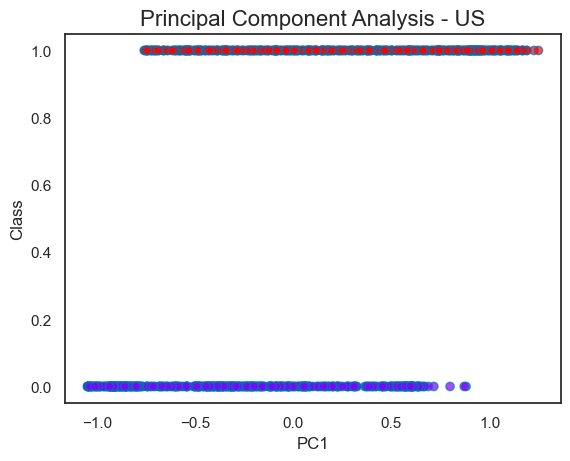

In [58]:
# PCA scatterplot - undersampled

plt.scatter(X_pca_train_us[:, 0], y_train_scaled_us, c = y_train_scaled_us, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.title('Principal Component Analysis - US', fontsize = 16)
plt.xlabel('PC1')
plt.ylabel('Class');

In [59]:
# Principal Component Analysis (PCA) - for oversampled dataset

pca_os = PCA(n_components = 1, random_state = 42)
X_pca_train_os = pca_os.fit_transform(X_train_scaled_os)
X_pca_test_os = pca_os.fit_transform(X_test_scaled_os)

In [60]:
# PCA Explained Variance Ratio - oversampled

pca_os.explained_variance_ratio_

array([0.3479])

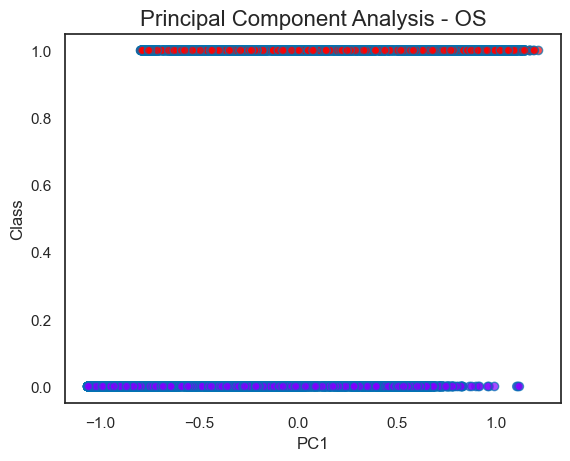

In [61]:
# PCA scatterplot - oversampled

plt.scatter( X_pca_train_os[:, 0], y_train_scaled_os, c = y_train_scaled_os, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.title('Principal Component Analysis - OS', fontsize = 16)
plt.xlabel('PC1')
plt.ylabel('Class');

# Modelling

## Random Forest Classifier - LDA undersampled

In [62]:
# Training the model on the training set (LDA undersampled)

classifier_rfc1 = RandomForestClassifier(criterion = 'entropy', random_state = 42)
classifier_rfc1.fit(X_lda_train_us, y_train_scaled_us)

RandomForestClassifier(criterion='entropy', random_state=42)

In [63]:
# Predicting the test set results

y_pred_rfc1 = classifier_rfc1.predict(X_lda_test_us)
print(np.concatenate((y_pred_rfc1.reshape(len(y_pred_rfc1), 1), y_test_scaled_us.values.reshape(len(y_test_scaled_us), 1)), 1))

[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]

In [64]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_rfc1 = confusion_matrix(y_test_scaled_us, y_pred_rfc1)
print('Confusion Matrix:')
print(cm_rfc1)
print()
print('The accuracy of the Random Forest Classifier model is ' + str(
    round(accuracy_score(y_test_scaled_us, y_pred_rfc1), 4)) + '.')

Confusion Matrix:
[[166   5]
 [  6 161]]

The accuracy of the Random Forest Classifier model is 0.9675.


In [65]:
# Printing a report of all scores for the model

print(classification_report(y_test_scaled_us, y_pred_rfc1, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.97      0.97      0.97       171
     Class 1       0.97      0.96      0.97       167

    accuracy                           0.97       338
   macro avg       0.97      0.97      0.97       338
weighted avg       0.97      0.97      0.97       338



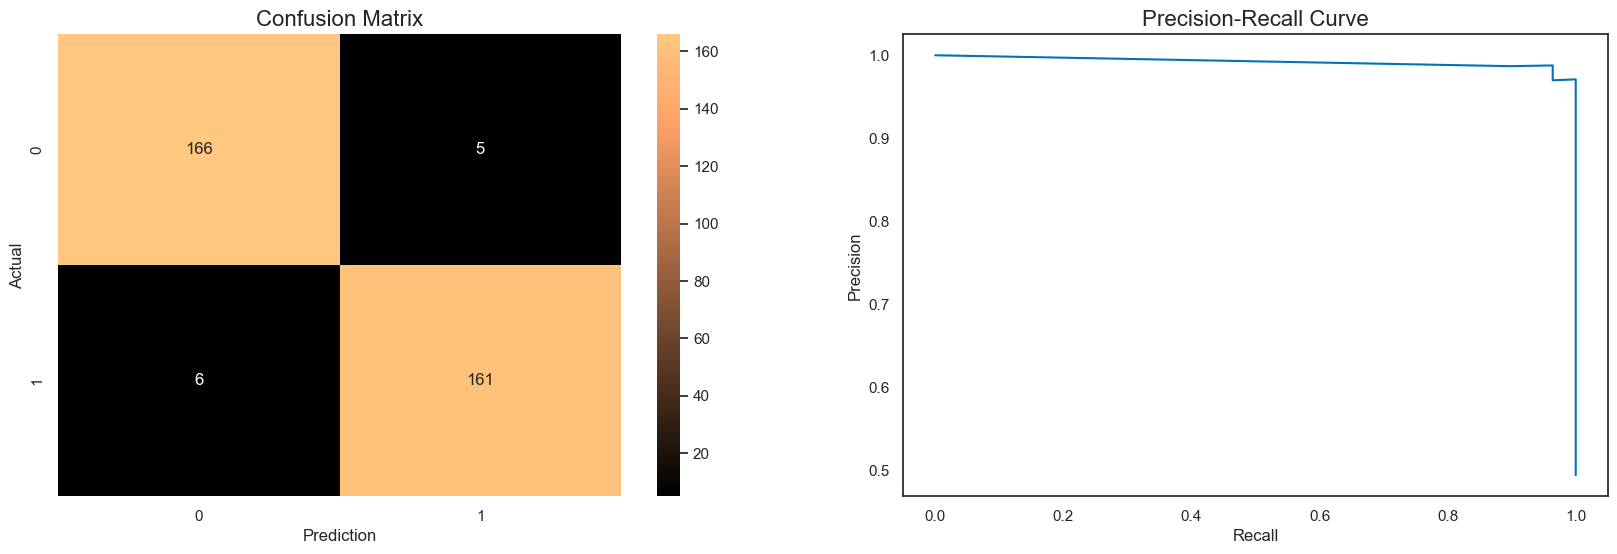

In [66]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_rfc1, ax = ax[0], annot = True, cmap = plt.cm.copper, fmt = 'g')
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_rfc1 = classifier_rfc1.predict_proba(X_lda_test_us)[:, 1]
precision_rfc1, recall_rfc1, _ = precision_recall_curve(y_test_scaled_us, y_score_rfc1)
ax[1].plot(recall_rfc1, precision_rfc1)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [67]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the Random Forest Classifier in the LDA undersampled scenario is ' + str(
    round(auc(recall_rfc1, precision_rfc1), 4)) + '.')

The AUC for the Random Forest Classifier in the LDA undersampled scenario is 0.9922.


## Random Forest Classifier - LDA oversampled

In [68]:
# Training the model on the training set (LDA oversampled)

X_train_scaled_us, X_test_scaled_us, y_train_scaled_us, y_test_scaled_us = train_test_split(
    X_scaled_us, y_scaled_us, test_size = 0.25, random_state = 42)

lda_us = LinearDiscriminantAnalysis()
X_lda_train_us = lda_us.fit_transform(X_train_scaled_us, y_train_scaled_us)
X_lda_test_us = lda_us.transform(X_test_scaled_us)
X_lda_train_us

classifier_rfc2 = RandomForestClassifier(criterion = 'entropy', random_state = 42)
classifier_rfc2.fit(X_lda_train_os, y_train_scaled_os)

RandomForestClassifier(criterion='entropy', random_state=42)

In [69]:
# Predicting the test set results

y_pred_rfc2 = classifier_rfc2.predict(X_lda_test_os)
print(np.concatenate((y_pred_rfc2.reshape(len(y_pred_rfc2), 1), y_test_scaled_os.values.reshape(len(y_test_scaled_os), 1)), 1))

[[0 1]
 [0 0]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [70]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_rfc2 = confusion_matrix(y_test_scaled_os, y_pred_rfc2)
print('Confusion Matrix:')
print(cm_rfc2)
print()
print('The accuracy of the Random Forest Classifier model is ' + str(
    round(accuracy_score(y_test_scaled_os, y_pred_rfc2), 4)) + '.')

Confusion Matrix:
[[1396   24]
 [  39 1364]]

The accuracy of the Random Forest Classifier model is 0.9777.


In [71]:
# Printing a report of all scores for the model

print(classification_report(y_test_scaled_os, y_pred_rfc2, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.97      0.98      0.98      1420
     Class 1       0.98      0.97      0.98      1403

    accuracy                           0.98      2823
   macro avg       0.98      0.98      0.98      2823
weighted avg       0.98      0.98      0.98      2823



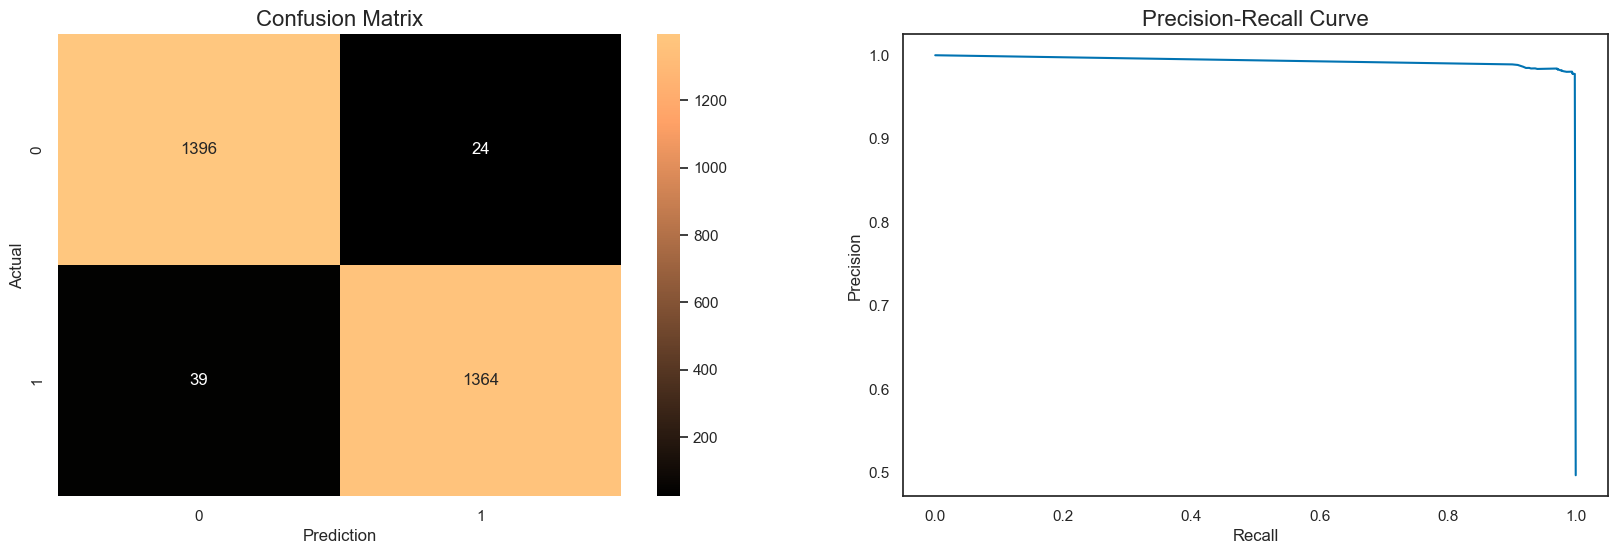

In [72]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_rfc2, ax = ax[0], annot = True, cmap = plt.cm.copper, fmt = 'g')
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_rfc2 = classifier_rfc2.predict_proba(X_lda_test_os)[:, 1]
precision_rfc2, recall_rfc2, _ = precision_recall_curve(y_test_scaled_os, y_score_rfc2)
ax[1].plot(recall_rfc2, precision_rfc2)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [73]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the Random Forest Classifier in the LDA oversampled scenario is ' + str(
    round(auc(recall_rfc2, precision_rfc2), 4)) + '.')

The AUC for the Random Forest Classifier in the LDA oversampled scenario is 0.9931.


## Random Forest Classifier - PCA undersampled

In [74]:
# Training the model on the training set (PCA undersampled)

classifier_rfc3 = RandomForestClassifier(criterion = 'entropy', random_state = 42)
classifier_rfc3.fit(X_pca_train_us, y_train_scaled_us)

RandomForestClassifier(criterion='entropy', random_state=42)

In [75]:
# Predicting the test set results

y_pred_rfc3 = classifier_rfc3.predict(X_pca_test_us)
print(np.concatenate((y_pred_rfc3.reshape(len(y_pred_rfc3), 1), y_test_scaled_us.values.reshape(len(y_test_scaled_us), 1)), 1))

[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]

In [76]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_rfc3 = confusion_matrix(y_test_scaled_us, y_pred_rfc3)
print('Confusion Matrix:')
print(cm_rfc3)
print()
print('The accuracy of the Random Forest Classifier model is ' + str(
    round(accuracy_score(y_test_scaled_us, y_pred_rfc3), 4)) + '.')

Confusion Matrix:
[[106  65]
 [ 58 109]]

The accuracy of the Random Forest Classifier model is 0.6361.


In [77]:
# Printing a report of all scores for the model

print(classification_report(y_test_scaled_us, y_pred_rfc3, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.65      0.62      0.63       171
     Class 1       0.63      0.65      0.64       167

    accuracy                           0.64       338
   macro avg       0.64      0.64      0.64       338
weighted avg       0.64      0.64      0.64       338



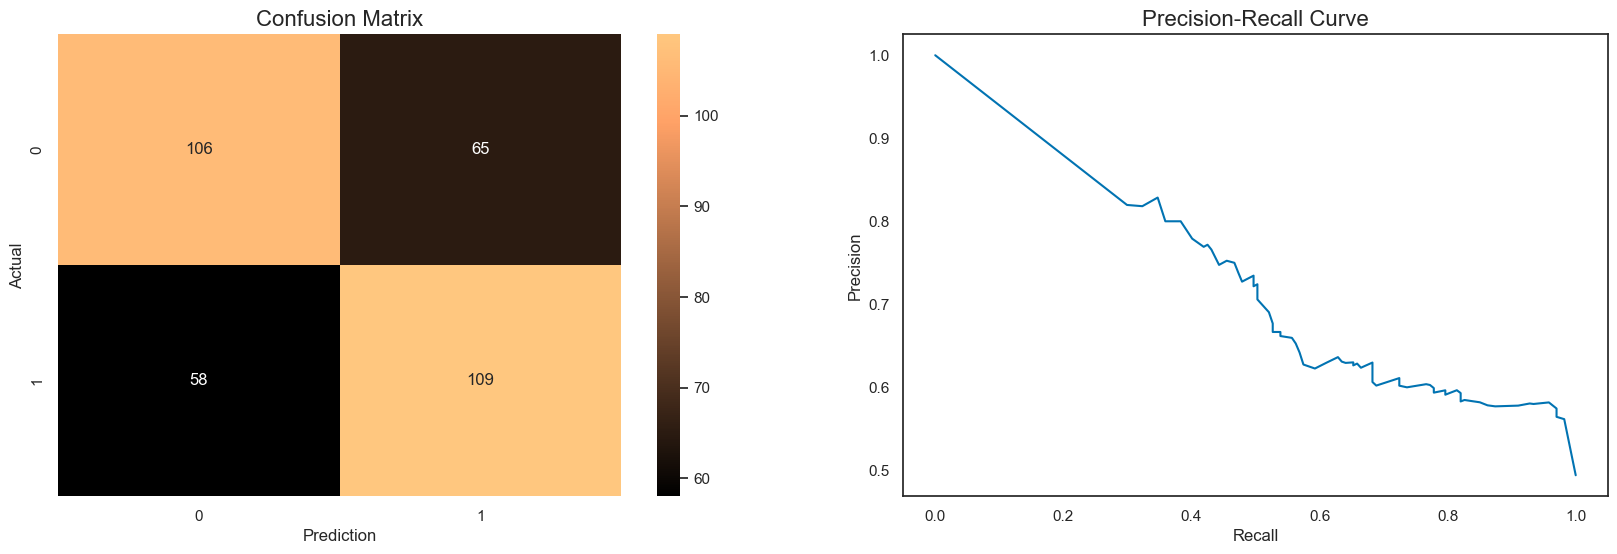

In [78]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_rfc3, ax = ax[0], annot = True, cmap = plt.cm.copper, fmt = 'g')
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_rfc3 = classifier_rfc3.predict_proba(X_pca_test_us)[:, 1]
precision_rfc3, recall_rfc3, _ = precision_recall_curve(y_test_scaled_us, y_score_rfc3)
ax[1].plot(recall_rfc3, precision_rfc3)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [79]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the Random Forest Classifier in the PCA undersampled scenario is ' + str(
    round(auc(recall_rfc3, precision_rfc3), 4)) + '.')

The AUC for the Random Forest Classifier in the PCA undersampled scenario is 0.7329.


## Random Forest Classifier - PCA oversampled

In [80]:
# Training the model on the training set (PCA oversampled)

classifier_rfc4 = RandomForestClassifier(criterion = 'entropy', random_state = 42)
classifier_rfc4.fit(X_pca_train_os, y_train_scaled_os)

RandomForestClassifier(criterion='entropy', random_state=42)

In [81]:
# Predicting the test set results

y_pred_rfc4 = classifier_rfc4.predict(X_pca_test_os)
print(np.concatenate((y_pred_rfc4.reshape(len(y_pred_rfc4), 1), y_test_scaled_os.values.reshape(len(y_test_scaled_os), 1)), 1))

[[0 1]
 [0 0]
 [0 1]
 ...
 [0 1]
 [0 0]
 [0 0]]


In [82]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_rfc4 = confusion_matrix(y_test_scaled_os, y_pred_rfc4)
print('Confusion Matrix:')
print(cm_rfc4)
print()
print('The accuracy of the Random Forest Classifier model is ' + str(
    round(accuracy_score(y_test_scaled_os, y_pred_rfc4), 4)) + '.')

Confusion Matrix:
[[858 562]
 [539 864]]

The accuracy of the Random Forest Classifier model is 0.61.


In [83]:
# Printing a report of all scores for the model

print(classification_report(y_test_scaled_os, y_pred_rfc4, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.61      0.60      0.61      1420
     Class 1       0.61      0.62      0.61      1403

    accuracy                           0.61      2823
   macro avg       0.61      0.61      0.61      2823
weighted avg       0.61      0.61      0.61      2823



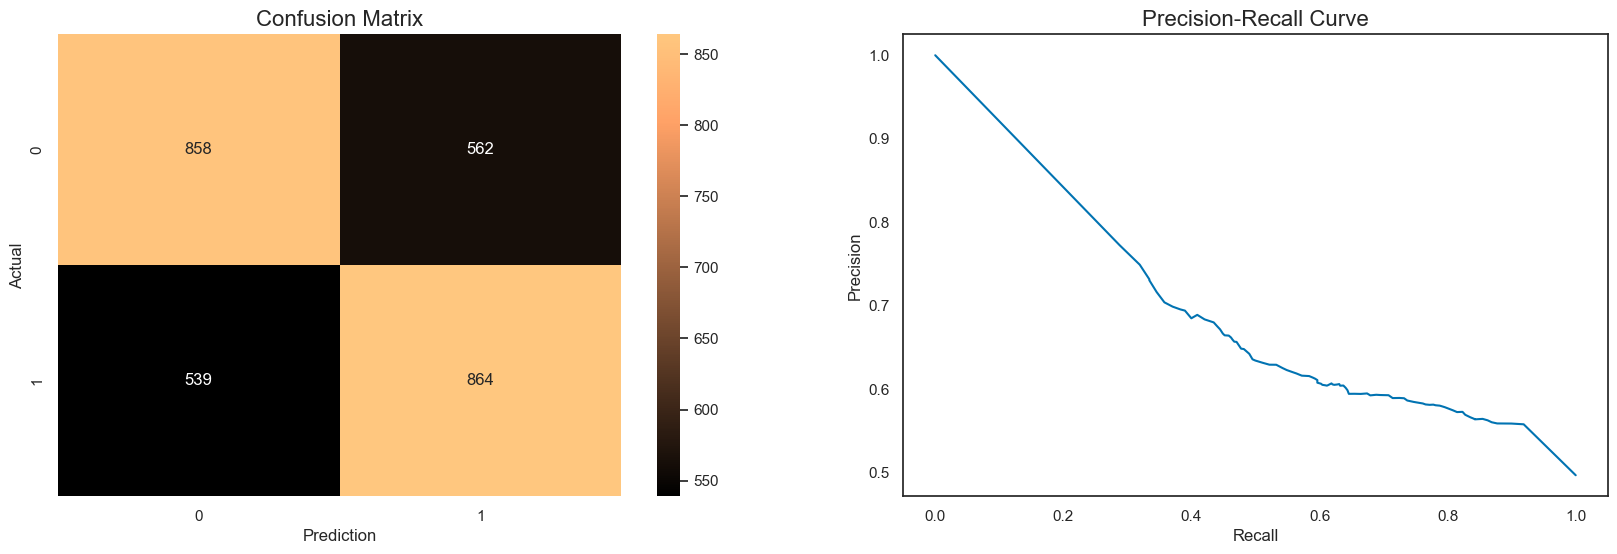

In [84]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_rfc4, ax = ax[0], annot = True, cmap = plt.cm.copper, fmt = 'g')
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_rfc4 = classifier_rfc4.predict_proba(X_pca_test_os)[:, 1]
precision_rfc4, recall_rfc4, _ = precision_recall_curve(y_test_scaled_os, y_score_rfc4)
ax[1].plot(recall_rfc4, precision_rfc4)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [85]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the Random Forest Classifier in the PCA oversampled scenario is ' + str(
    round(auc(recall_rfc4, precision_rfc4), 4)) + '.')

The AUC for the Random Forest Classifier in the PCA oversampled scenario is 0.6936.


## K-Nearest Neighbor Classifier - LDA undersampled

In [86]:
# Training the model on the training set (LDA undersampled)

classifier_knn1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn1.fit(X_lda_train_us, y_train_scaled_us)

KNeighborsClassifier()

In [87]:
# Predicting the test set results

y_pred_knn1 = classifier_knn1.predict(X_lda_test_us)
print(np.concatenate((y_pred_knn1.reshape(len(y_pred_knn1), 1), y_test_scaled_us.values.reshape(len(y_test_scaled_us), 1)), 1))

[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]

In [88]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_knn1 = confusion_matrix(y_test_scaled_us, y_pred_knn1)
print('Confusion Matrix:')
print(cm_knn1)
print()
print('The accuracy of the K-Nearest Neighbors Classifier model is ' + str(
    round(accuracy_score(y_test_scaled_us, y_pred_knn1), 4)) + '.')

Confusion Matrix:
[[169   2]
 [  1 166]]

The accuracy of the K-Nearest Neighbors Classifier model is 0.9911.


In [89]:
# Printing a report of all scores for the model

print(classification_report(y_test_scaled_us, y_pred_knn1, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99       171
     Class 1       0.99      0.99      0.99       167

    accuracy                           0.99       338
   macro avg       0.99      0.99      0.99       338
weighted avg       0.99      0.99      0.99       338



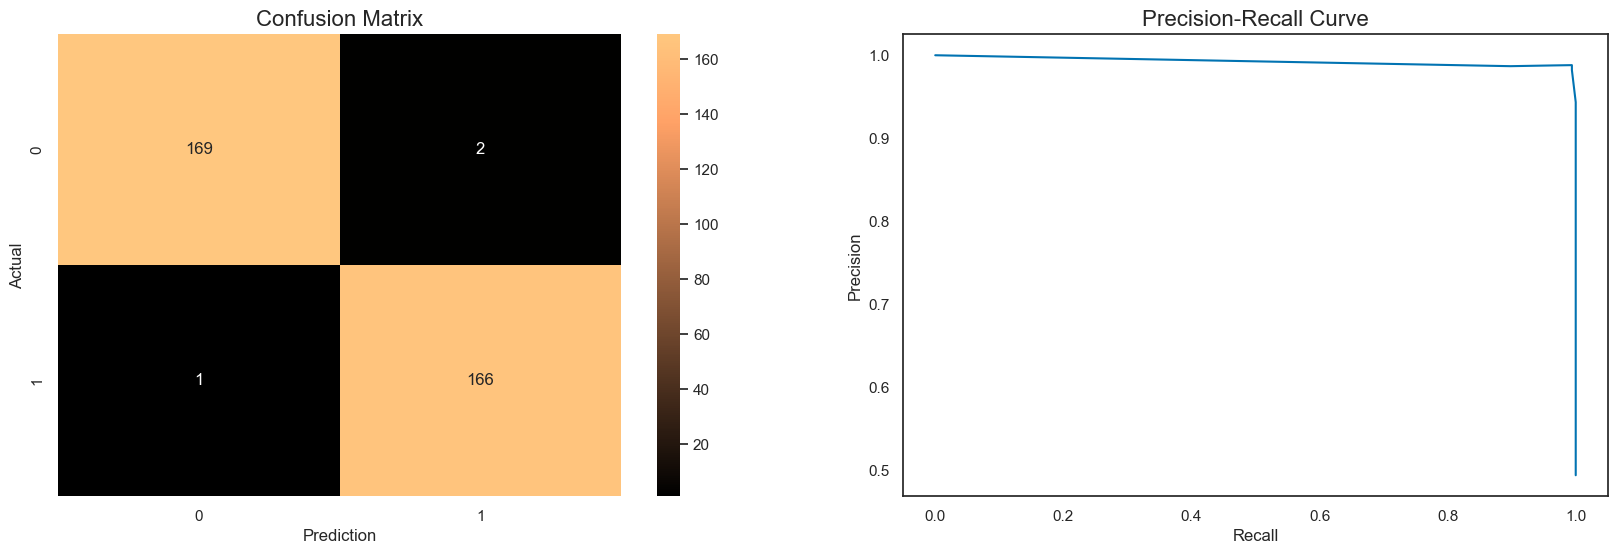

In [90]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_knn1, ax = ax[0], annot = True, cmap = plt.cm.copper, fmt = 'g')
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_knn1 = classifier_knn1.predict_proba(X_lda_test_us)[:, 1]
precision_knn1, recall_knn1, _ = precision_recall_curve(y_test_scaled_us, y_score_knn1)
ax[1].plot(recall_knn1, precision_knn1)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [91]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the K-Nearest Neighbor Classifier in the LDA undersampled scenario is ' + str(
    round(auc(recall_knn1, precision_knn1), 4)) + '.')

The AUC for the K-Nearest Neighbor Classifier in the LDA undersampled scenario is 0.9927.


## K-Nearest Neighbor Classifier - LDA oversampled

In [92]:
# Training the model on the training set (LDA oversampled)

classifier_knn2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn2.fit(X_lda_train_os, y_train_scaled_os)

KNeighborsClassifier()

In [93]:
# Predicting the test set results

y_pred_knn2 = classifier_knn2.predict(X_lda_test_os)
print(np.concatenate((y_pred_knn2.reshape(len(y_pred_knn2), 1), y_test_scaled_os.values.reshape(len(y_test_scaled_os), 1)), 1))

[[1 1]
 [0 0]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [94]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_knn2 = confusion_matrix(y_test_scaled_os, y_pred_knn2)
print('Confusion Matrix:')
print(cm_knn2)
print()
print('The accuracy of the K-Nearest Neighbors Classifier model is ' + str(
    round(accuracy_score(y_test_scaled_os, y_pred_knn2), 4)) + '.')

Confusion Matrix:
[[1394   26]
 [   6 1397]]

The accuracy of the K-Nearest Neighbors Classifier model is 0.9887.


In [95]:
# Printing a report of all scores for the model

print(classification_report(y_test_scaled_os, y_pred_knn2, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99      1420
     Class 1       0.98      1.00      0.99      1403

    accuracy                           0.99      2823
   macro avg       0.99      0.99      0.99      2823
weighted avg       0.99      0.99      0.99      2823



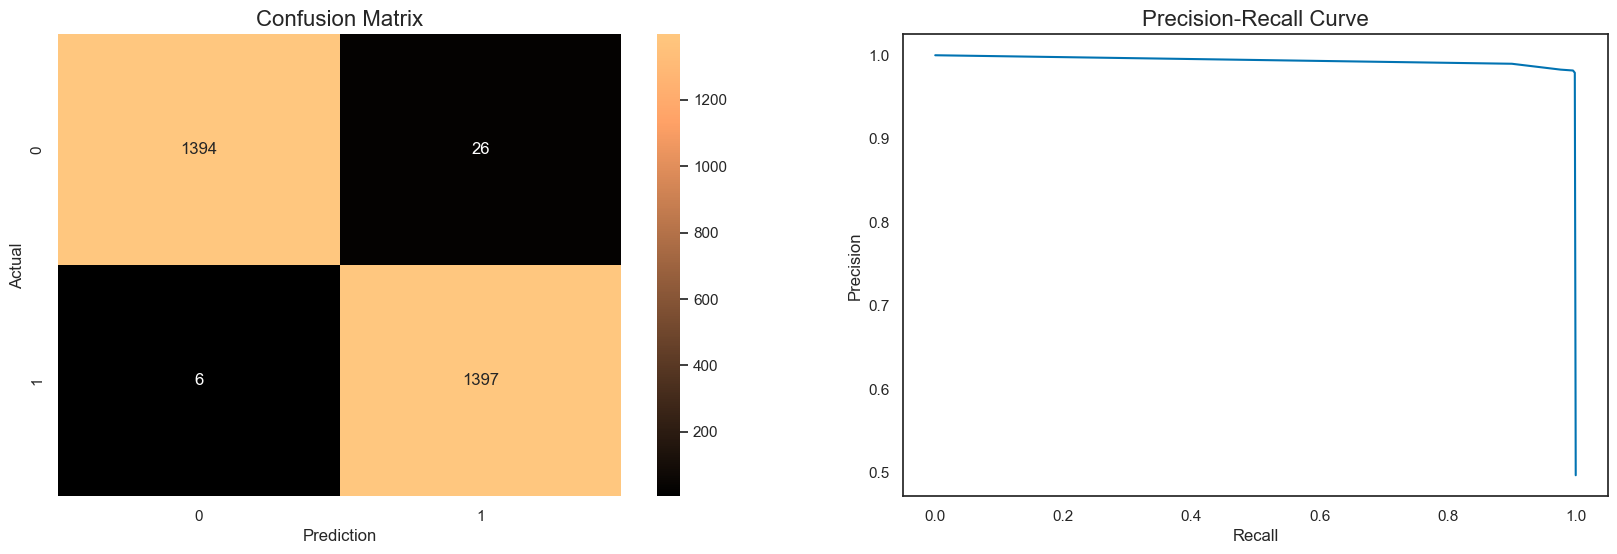

In [96]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_knn2, ax = ax[0], annot = True, cmap = plt.cm.copper, fmt = 'g')
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_knn2 = classifier_knn2.predict_proba(X_lda_test_os)[:, 1]
precision_knn2, recall_knn2, _ = precision_recall_curve(y_test_scaled_os, y_score_knn2)
ax[1].plot(recall_knn2, precision_knn2)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [97]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the K-Nearest Neighbor Classifier in the LDA oversampled scenario is ' + str(
    round(auc(recall_knn2, precision_knn2), 4)) + '.')

The AUC for the K-Nearest Neighbor Classifier in the LDA oversampled scenario is 0.9936.


## K-Nearest Neighbor Classifier - PCA undersampled

In [98]:
# Training the model on the training set (PCA undersampled)

classifier_knn3 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn3.fit(X_pca_train_us, y_train_scaled_us)

KNeighborsClassifier()

In [99]:
# Predicting the test set results

y_pred_knn3 = classifier_knn3.predict(X_pca_test_us)
print(np.concatenate((y_pred_knn3.reshape(len(y_pred_knn3), 1), y_test_scaled_us.values.reshape(len(y_test_scaled_us), 1)), 1))

[[0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]

In [100]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_knn3 = confusion_matrix(y_test_scaled_us, y_pred_knn3)
print('Confusion Matrix:')
print(cm_knn3)
print()
print('The accuracy of the K-Nearest Neighbors Classifier model is ' + str(
    round(accuracy_score(y_test_scaled_us, y_pred_knn3), 4)) + '.')

Confusion Matrix:
[[110  61]
 [ 63 104]]

The accuracy of the K-Nearest Neighbors Classifier model is 0.6331.


In [101]:
# Printing a report of all scores for the model

print(classification_report(y_test_scaled_us, y_pred_knn3, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.64      0.64      0.64       171
     Class 1       0.63      0.62      0.63       167

    accuracy                           0.63       338
   macro avg       0.63      0.63      0.63       338
weighted avg       0.63      0.63      0.63       338



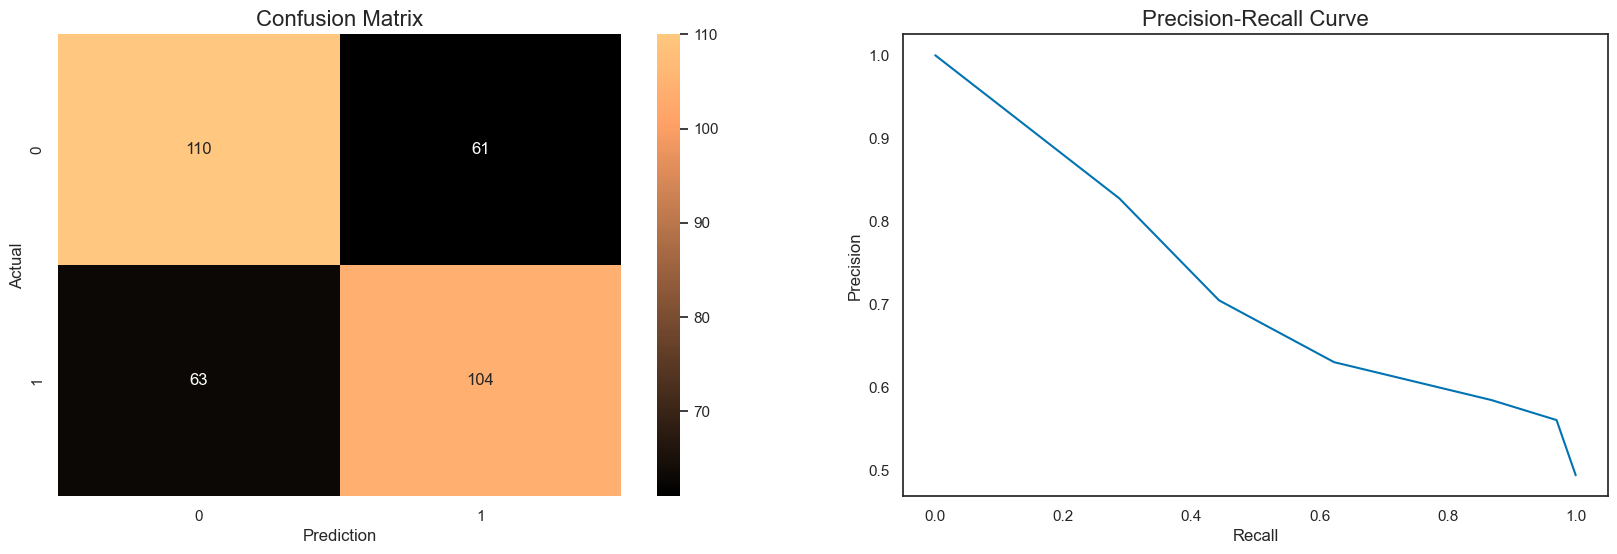

In [102]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_knn3, ax = ax[0], annot = True, cmap = plt.cm.copper, fmt = 'g')
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_knn3 = classifier_knn3.predict_proba(X_pca_test_us)[:, 1]
precision_knn3, recall_knn3, _ = precision_recall_curve(y_test_scaled_us, y_score_knn3)
ax[1].plot(recall_knn3, precision_knn3)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [103]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the K-Nearest Neighbor Classifier in the PCA undersampled scenario is ' + str(
    round(auc(recall_knn3, precision_knn3), 4)) + '.')

The AUC for the K-Nearest Neighbor Classifier in the PCA undersampled scenario is 0.7251.


## K-Nearest Neighbor Classifier - PCA oversampled

In [104]:
# Training the model on the training set (PCA undersampled)

classifier_knn4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn4.fit(X_pca_train_os, y_train_scaled_os)

KNeighborsClassifier()

In [105]:
# Predicting the test set results

y_pred_knn4 = classifier_knn4.predict(X_pca_test_os)
print(np.concatenate((y_pred_knn4.reshape(len(y_pred_knn4), 1), y_test_scaled_os.values.reshape(len(y_test_scaled_os), 1)), 1))

[[1 1]
 [1 0]
 [1 1]
 ...
 [0 1]
 [0 0]
 [0 0]]


In [106]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_knn4 = confusion_matrix(y_test_scaled_os, y_pred_knn4)
print('Confusion Matrix:')
print(cm_knn4)
print()
print('The accuracy of the K-Nearest Neighbors Classifier model is ' + str(
    round(accuracy_score(y_test_scaled_os, y_pred_knn4), 4)) + '.')

Confusion Matrix:
[[843 577]
 [524 879]]

The accuracy of the K-Nearest Neighbors Classifier model is 0.61.


In [107]:
# Printing a report of all scores for the model

print(classification_report(y_test_scaled_os, y_pred_knn4, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.62      0.59      0.60      1420
     Class 1       0.60      0.63      0.61      1403

    accuracy                           0.61      2823
   macro avg       0.61      0.61      0.61      2823
weighted avg       0.61      0.61      0.61      2823



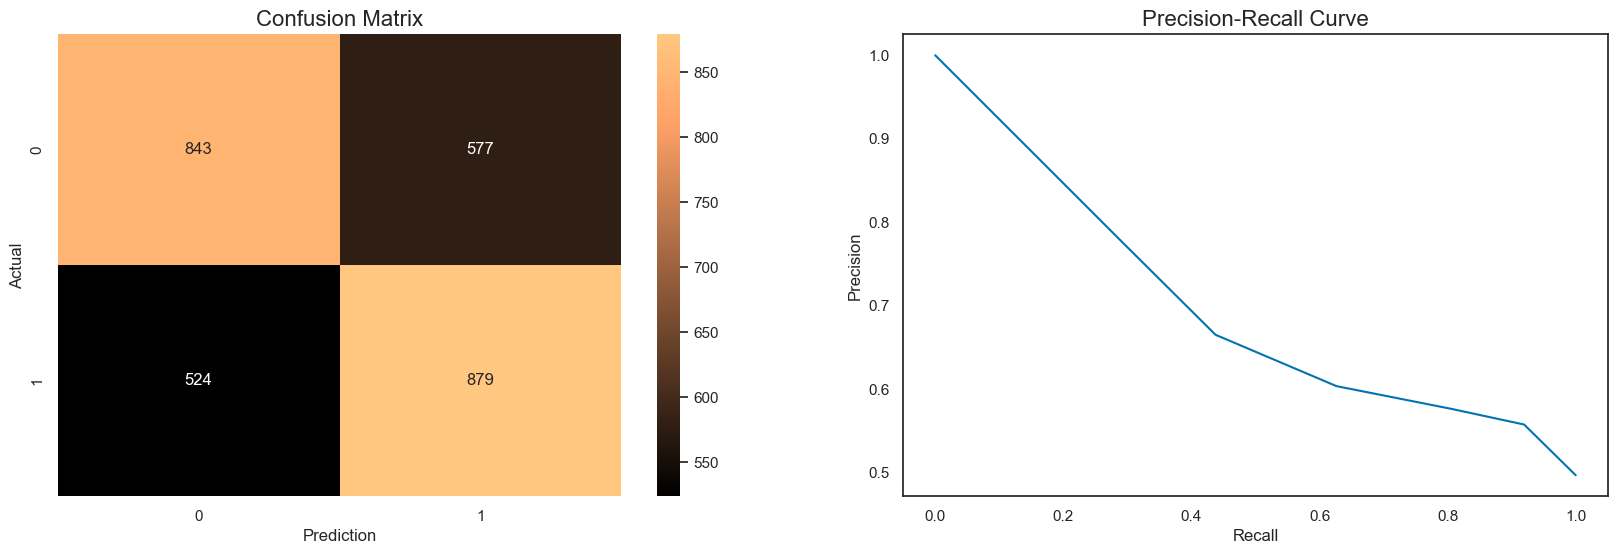

In [108]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_knn4, ax = ax[0], annot = True, cmap = plt.cm.copper, fmt = 'g')
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_knn4 = classifier_knn4.predict_proba(X_pca_test_os)[:, 1]
precision_knn4, recall_knn4, _ = precision_recall_curve(y_test_scaled_os, y_score_knn4)
ax[1].plot(recall_knn4, precision_knn4)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [109]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the K-Nearest Neighbor Classifier in the PCA oversampled scenario is ' + str(
    round(auc(recall_knn4, precision_knn4), 4)) + '.')

The AUC for the K-Nearest Neighbor Classifier in the PCA oversampled scenario is 0.6968.


### _Comparing results and tuning hyperparameters_

In [110]:
# Comparing all AUC results

auc_df = pd.Series({'auc_rfc': auc(recall_rfc, precision_rfc), 'auc_knn': auc(recall_knn, precision_knn),
                    'auc_rfc1': auc(recall_rfc1, precision_rfc1), 'auc_knn1': auc(recall_knn1, precision_knn1), 
                    'auc_rfc2': auc(recall_rfc2, precision_rfc2), 'auc_knn2': auc(recall_knn2, precision_knn2), 
                    'auc_rfc3': auc(recall_rfc3, precision_rfc3), 'auc_knn3': auc(recall_knn3, precision_knn3), 
                    'auc_rfc4': auc(recall_rfc4, precision_rfc4), 'auc_knn4': auc(recall_knn4, precision_knn4)})
auc_df.sort_values(ascending = False)

auc_rfc     0.996972
auc_knn2    0.993596
auc_knn     0.993264
auc_rfc2    0.993109
auc_knn1    0.992669
auc_rfc1    0.992191
auc_rfc3    0.732910
auc_knn3    0.725070
auc_knn4    0.696849
auc_rfc4    0.693564
dtype: float64

In [111]:
# Creating the parameter grid based on the results of grid search 

param_grid = { 
    'n_estimators': [100, 200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
    'criterion' :['gini', 'entropy']
}

classifier_rfc_CV = GridSearchCV(estimator = classifier_rfc, param_grid = param_grid, scoring = auc, n_jobs = -1, verbose = 2)
classifier_rfc_CV.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring=<function auc at 0x0000012E14616C10>, verbose=2)

In [112]:
# Finding best parameters

classifier_rfc_CV.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 100}

In [113]:
# Training the model on the training set (not scaled or resampled dataset)

classifier_rfc_CV_final = RandomForestClassifier(criterion = 'gini', max_depth = 4, max_features = 'auto', n_estimators = 100, 
                                                 random_state = 42)
classifier_rfc_CV_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='auto', random_state=42)

In [114]:
# Predicting the test set results

y_pred_rfc_CV_final = classifier_rfc_CV_final.predict(X_test)
print(np.concatenate((y_pred_rfc_CV_final.reshape(len(y_pred_rfc_CV_final), 1), y_test.values.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [115]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_rfc_CV_final = confusion_matrix(y_test, y_pred_rfc_CV_final)
print('Confusion Matrix:')
print(cm_rfc_CV_final)
print()
print('The accuracy of the Random Forest Classifier model with GridSearch parameters is ' + str(
    round(accuracy_score(y_test, y_pred_rfc_CV_final), 4)) + '.')

Confusion Matrix:
[[1396   29]
 [   2  154]]

The accuracy of the Random Forest Classifier model with GridSearch parameters is 0.9804.


In [116]:
# Printing a report of all scores for the model

print(classification_report(y_test, y_pred_rfc_CV_final, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99      1425
     Class 1       0.84      0.99      0.91       156

    accuracy                           0.98      1581
   macro avg       0.92      0.98      0.95      1581
weighted avg       0.98      0.98      0.98      1581



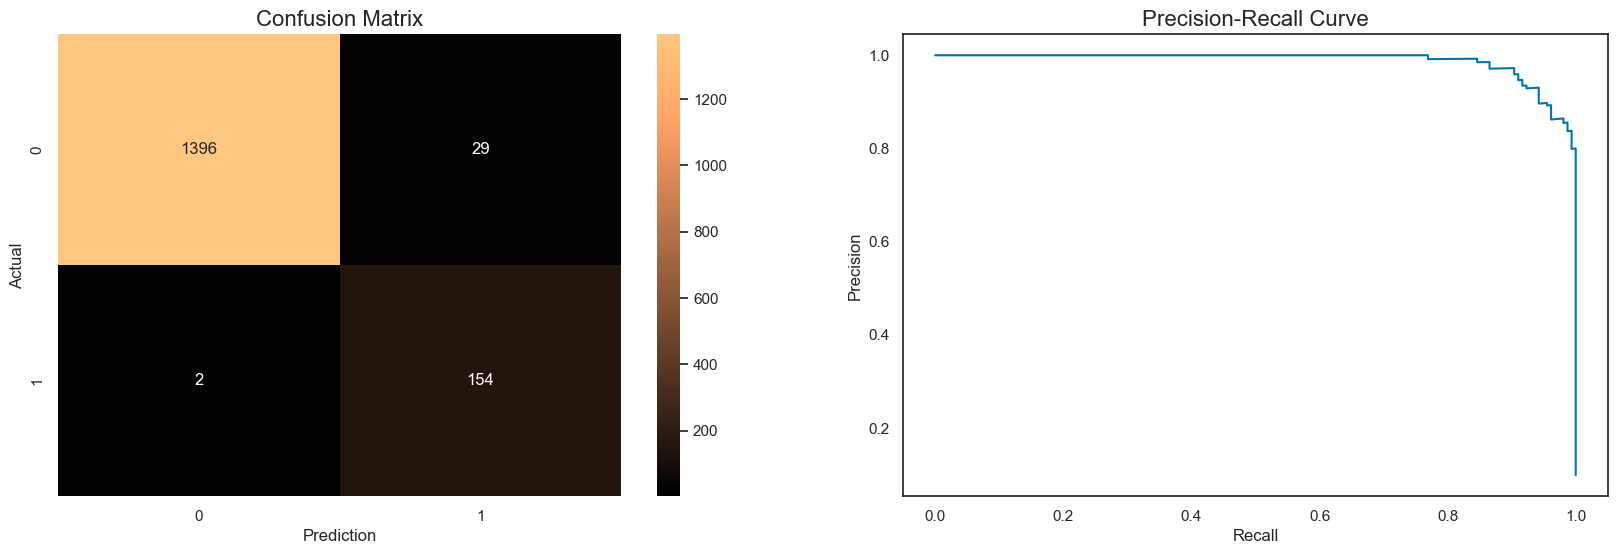

In [117]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_rfc_CV_final, ax = ax[0], annot = True, cmap = plt.cm.copper, fmt = 'g')
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_rfc_CV_final = classifier_rfc_CV_final.predict_proba(X_test)[:, 1]
precision_rfc_CV_final, recall_rfc_CV_final, _ = precision_recall_curve(y_test, y_score_rfc_CV_final)
ax[1].plot(recall_rfc_CV_final, precision_rfc_CV_final)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [118]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the Random Forest Classifier in the scenario with no treatment and GridSearch parameters is ' + str(
    round(auc(recall_rfc_CV_final, precision_rfc_CV_final), 4)) + '.')

The AUC for the Random Forest Classifier in the scenario with no treatment and GridSearch parameters is 0.9878.


# Evaluation

This dataset and report show the importance of the pre-processing steps in order to achieve excellent results in machine learning model predictions. Though it is mentioned by the authors Alzahrani and Sadaoui (2018a and 2018b) and Alzahrani (2019) all the difficulties they had to scrape and pre-process data about SB, they did an excellent work and there was not much left to be done before applying machine learning models.

As suspected, RF achieved its best result in the dataset without any treatments. It is important, however, to always execute tests and experiment with different techniques to observe all the outcomes and make a final decision. In this case, models were applied before and after the steps of scaling, balancing and reshaping the dataset using two different dimensionality reduction techniques. GridSearchCV it is also fundamental to help finding the best set of hyperparemeters in order to achieve not only higher scores, but more accurate and reliable ones.

Through the work of Alzahrani and Sadaoui (2018a and 2018b) and Alzahrani (2019) eBay and other e-commerce businesses have, now, knowledge, tools and techniques to detect suspicious activities and prevent cyber-crimes in online auctions.